In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import requests

In [ ]:
import json

**DATA GATHERING USING API CALLS: CENSUS DATA USA**

In [ ]:
import requests
from bs4 import BeautifulSoup
import urllib.request

In [ ]:
url = 'https://api.census.gov/data/timeseries/healthins/sahie/variables.html'

In [ ]:
r = requests.get(url)
soup = BeautifulSoup(r.text, "lxml")

In [ ]:
variable_list = []
for i in [i.text.upper().strip() for i in soup.findAll('a', href=True)]:
  variable_list.append('{}'.format(i))

In [ ]:
variable_list = [item for item in variable_list if item != '']

In [ ]:
variable_list[:5]

['AGE_DESC', 'AGECAT', 'COUNTY', 'FOR', 'GEOCAT']

In [ ]:
labels_list = []
for i in [i.text.lower().strip() for i in soup.findAll('td')]:
  labels_list.append('{}'.format(i))

In [ ]:
labels_list_final = []
c = 2
for i in range(0,len(labels_list)-16):
  print(labels_list[c+i])
  labels_list_final.append(labels_list[c+i])
  c = c+7
  if i == 39:
    break

age category description
age category
county fips code
census api fips 'for' clause
summary level
state+county fips code
census api fips 'in' clause
income poverty ratio category description
income poverty ratio category
state or county name
number insured, lower bound for 90% confidence interval
number insured, margin of error
number insured, estimate
number insured, upper bound for 90% confidence interval
number in demographic group for selected income range, upper bound for 90% confidence interval
number in demographic group for selected income range, margin of error
number in demographic group for selected income range, estimate
number in demographic group for selected income range, lower bound for 90% confidence interval
number uninsured, lower bound for 90% confidence interval
number uninsured, margin of error
number uninsured, estimate
number uninsured, upper bound for 90% confidence interval
percent insured, lower bound for 90% confidence interval
percent insured in demographic

In [ ]:
labels_list_final[:5]

['age category description',
 'age category',
 'county fips code',
 "census api fips 'for' clause",
 'summary level']

In [ ]:
len(labels_list_final) == len(variable_list)

True

In [ ]:
import requests
import json

In [ ]:
len(variable_list)

40

In [ ]:
variable_list

['AGE_DESC',
 'AGECAT',
 'COUNTY',
 'FOR',
 'GEOCAT',
 'GEOID',
 'IN',
 'IPR_DESC',
 'IPRCAT',
 'NAME',
 'NIC_LB90',
 'NIC_MOE',
 'NIC_PT',
 'NIC_UB90',
 'NIPR_LB90',
 'NIPR_MOE',
 'NIPR_PT',
 'NIPR_UB90',
 'NUI_LB90',
 'NUI_MOE',
 'NUI_PT',
 'NUI_UB90',
 'PCTIC_LB90',
 'PCTIC_MOE',
 'PCTIC_PT',
 'PCTIC_UB90',
 'PCTUI_LB90',
 'PCTUI_MOE',
 'PCTUI_PT',
 'PCTUI_UB90',
 'RACE_DESC',
 'RACECAT',
 'SEX_DESC',
 'SEXCAT',
 'STABREV',
 'STATE',
 'TIME',
 'UCGID',
 'US',
 'YEAR']

In [ ]:
values_to_drop = ['AGECAT', 'RACECAT', 'SEXCAT', 'TIME','FOR','IN','UCGID']

# Using list comprehension to drop values
variable_list = [item for item in variable_list if item not in values_to_drop]

In [ ]:
variable_list[-5:]

['SEX_DESC', 'STABREV', 'STATE', 'US', 'YEAR']

In [ ]:
get_params = ",".join(variable_list)
base_url = "https://api.census.gov/data/timeseries/healthins/sahie"
params = {
    "get": get_params,
    "for": "state:*",
    "time": "2021",
    "key": "97ab6783a7384707abfdb556ef5b73a63f49a0be"
}

response = requests.get(base_url, params=params)

if response.status_code == 200:
    data = response.json()
    for row in data:
        print(row)
else:
    print(f"Error: {response.status_code}")

['AGE_DESC', 'COUNTY', 'GEOCAT', 'GEOID', 'IPR_DESC', 'IPRCAT', 'NAME', 'NIC_LB90', 'NIC_MOE', 'NIC_PT', 'NIC_UB90', 'NIPR_LB90', 'NIPR_MOE', 'NIPR_PT', 'NIPR_UB90', 'NUI_LB90', 'NUI_MOE', 'NUI_PT', 'NUI_UB90', 'PCTIC_LB90', 'PCTIC_MOE', 'PCTIC_PT', 'PCTIC_UB90', 'PCTUI_LB90', 'PCTUI_MOE', 'PCTUI_PT', 'PCTUI_UB90', 'RACE_DESC', 'SEX_DESC', 'STABREV', 'STATE', 'US', 'YEAR', 'time', 'state']
['Under 65 years', '000', '040', '01000', 'All Incomes', '0', 'Alabama', '3533978', '14547', '3548525', '3563072', '4018412', '0', '4018412', '4018412', '455340', '14547', '469887', '484434', '87.9', '0.4', '88.3', '88.7', '11.3', '0.4', '11.7', '12.1', 'All Races', 'Both Sexes', 'AL', '01', '0', '2021', '2021', '01']
['Under 65 years', '000', '040', '02000', 'All Incomes', '0', 'Alaska', '526041', '4284', '530325', '534609', '610863', '0', '610863', '610863', '76254', '4284', '80538', '84822', '86.1', '0.7', '86.8', '87.5', '12.5', '0.7', '13.2', '13.9', 'All Races', 'Both Sexes', 'AK', '02', '0', '

In [ ]:
response.url

'https://api.census.gov/data/timeseries/healthins/sahie?get=AGE_DESC%2CCOUNTY%2CGEOCAT%2CGEOID%2CIPR_DESC%2CIPRCAT%2CNAME%2CNIC_LB90%2CNIC_MOE%2CNIC_PT%2CNIC_UB90%2CNIPR_LB90%2CNIPR_MOE%2CNIPR_PT%2CNIPR_UB90%2CNUI_LB90%2CNUI_MOE%2CNUI_PT%2CNUI_UB90%2CPCTIC_LB90%2CPCTIC_MOE%2CPCTIC_PT%2CPCTIC_UB90%2CPCTUI_LB90%2CPCTUI_MOE%2CPCTUI_PT%2CPCTUI_UB90%2CRACE_DESC%2CSEX_DESC%2CSTABREV%2CSTATE%2CUS%2CYEAR&for=state%3A%2A&time=2021&key=97ab6783a7384707abfdb556ef5b73a63f49a0be'

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
df

0       1       2      3                        4       5   \
0          AGE_DESC  COUNTY  GEOCAT  GEOID                 IPR_DESC  IPRCAT   
1    Under 65 years     000     040  01000              All Incomes       0   
2    Under 65 years     000     040  02000              All Incomes       0   
3    Under 65 years     000     040  04000              All Incomes       0   
4    Under 65 years     000     040  05000              All Incomes       0   
..              ...     ...     ...    ...                      ...     ...   
302  Under 65 years     000     040  47000       <= 400% of Poverty       4   
303  Under 65 years     000     040  47000  138% to 400% of Poverty       5   
304  Under 65 years     000     040  40000       <= 400% of Poverty       4   
305  Under 65 years     000     040  40000  138% to 400% of Poverty       5   
306  Under 65 years     000     040  20000  138% to 400% of Poverty       5   

            6         7        8        9   ...        25          26  \
0         NAME  NIC_LB90  NIC_MOE   NIC_PT  ...  PCTUI_PT  PCTUI_UB90   
1      Alabama   3533978    14547  3548525  ...      11.7        12.1   
2       Alaska    526041     4284   530325  ...      13.2        13.9   
3      Arizona   4996687    19643  5016330  ...      13.1        13.4   
4     Arkansas   2148261    10480  2158741  ...      11.1        11.5   
..         ...       ...      ...      ...  ...       ...         ...   
302  Tennessee   3049244    22849  3072093  ...      15.7        16.1   
303  Tennessee   2087882    19433  2107315  ...      13.4        13.8   
304   Oklahoma   1730805    13607  1744412  ...      21.1        21.6   
305   Oklahoma   1161103    11838  1172941  ...      18.7        19.2   
306     Kansas    888394    10258   898652  ...      13.0        13.5   

            27          28       29     30  31    32    33     34  
0    RACE_DESC    SEX_DESC  STABREV  STATE  US  YEAR  time  state  
1    All Races  Both Sexes       AL     01   0  2021  2021     01  
2    All Races  Both Sexes       AK     02   0  2021  2021     02  
3    All Races  Both Sexes       AZ     04   0  2021  2021     04  
4    All Races  Both Sexes       AR     05   0  2021  2021     05  
..         ...         ...      ...    ...  ..   ...   ...    ...  
302  All Races  Both Sexes       TN     47   0  2021  2021     47  
303  All Races  Both Sexes       TN     47   0  2021  2021     47  
304  All Races  Both Sexes       OK     40   0  2021  2021     40  
305  All Races  Both Sexes       OK     40   0  2021  2021     40  
306  All Races  Both Sexes       KS     20   0  2021  2021     20  

[307 rows x 35 columns]

In [ ]:
df.columns = df.iloc[0]

In [ ]:
df = df[1:]

In [ ]:
df

0          AGE_DESC COUNTY GEOCAT  GEOID                 IPR_DESC IPRCAT  \
1    Under 65 years    000    040  01000              All Incomes      0   
2    Under 65 years    000    040  02000              All Incomes      0   
3    Under 65 years    000    040  04000              All Incomes      0   
4    Under 65 years    000    040  05000              All Incomes      0   
5    Under 65 years    000    040  09000              All Incomes      0   
..              ...    ...    ...    ...                      ...    ...   
302  Under 65 years    000    040  47000       <= 400% of Poverty      4   
303  Under 65 years    000    040  47000  138% to 400% of Poverty      5   
304  Under 65 years    000    040  40000       <= 400% of Poverty      4   
305  Under 65 years    000    040  40000  138% to 400% of Poverty      5   
306  Under 65 years    000    040  20000  138% to 400% of Poverty      5   

0           NAME NIC_LB90 NIC_MOE   NIC_PT  ... PCTUI_PT PCTUI_UB90  \
1        Alabama  3533978   14547  3548525  ...     11.7       12.1   
2         Alaska   526041    4284   530325  ...     13.2       13.9   
3        Arizona  4996687   19643  5016330  ...     13.1       13.4   
4       Arkansas  2148261   10480  2158741  ...     11.1       11.5   
5    Connecticut  2693556    9134  2702690  ...      6.0        6.3   
..           ...      ...     ...      ...  ...      ...        ...   
302    Tennessee  3049244   22849  3072093  ...     15.7       16.1   
303    Tennessee  2087882   19433  2107315  ...     13.4       13.8   
304     Oklahoma  1730805   13607  1744412  ...     21.1       21.6   
305     Oklahoma  1161103   11838  1172941  ...     18.7       19.2   
306       Kansas   888394   10258   898652  ...     13.0       13.5   

0    RACE_DESC    SEX_DESC STABREV STATE US  YEAR  time state  
1    All Races  Both Sexes      AL    01  0  2021  2021    01  
2    All Races  Both Sexes      AK    02  0  2021  2021    02  
3    All Races  Both Sexes      AZ    04  0  2021  2021    04  
4    All Races  Both Sexes      AR    05  0  2021  2021    05  
5    All Races  Both Sexes      CT    09  0  2021  2021    09  
..         ...         ...     ...   ... ..   ...   ...   ...  
302  All Races  Both Sexes      TN    47  0  2021  2021    47  
303  All Races  Both Sexes      TN    47  0  2021  2021    47  
304  All Races  Both Sexes      OK    40  0  2021  2021    40  
305  All Races  Both Sexes      OK    40  0  2021  2021    40  
306  All Races  Both Sexes      KS    20  0  2021  2021    20  

[306 rows x 35 columns]

In [ ]:
df[df['NAME'] == 'Kansas']

0          AGE_DESC COUNTY GEOCAT  GEOID                 IPR_DESC IPRCAT  \
40   Under 65 years    000    040  20000              All Incomes      0   
41   Under 65 years    000    040  20000       <= 200% of Poverty      1   
118  Under 65 years    000    040  20000       <= 250% of Poverty      2   
168  Under 65 years    000    040  20000       <= 138% of Poverty      3   
217  Under 65 years    000    040  20000       <= 400% of Poverty      4   
306  Under 65 years    000    040  20000  138% to 400% of Poverty      5   

0      NAME NIC_LB90 NIC_MOE   NIC_PT  ... PCTUI_PT PCTUI_UB90  RACE_DESC  \
40   Kansas  2126629    9491  2136120  ...     10.9       11.3  All Races   
41   Kansas   542980    9402   552382  ...     19.2       20.0  All Races   
118  Kansas   716268   10202   726470  ...     18.2       18.9  All Races   
168  Kansas   333227    7833   341060  ...     20.1       21.1  All Races   
217  Kansas  1227832   11880  1239712  ...     15.0       15.6  All Races   
306  Kansas   888394   10258   898652  ...     13.0       13.5  All Races   

0      SEX_DESC STABREV STATE US  YEAR  time state  
40   Both Sexes      KS    20  0  2021  2021    20  
41   Both Sexes      KS    20  0  2021  2021    20  
118  Both Sexes      KS    20  0  2021  2021    20  
168  Both Sexes      KS    20  0  2021  2021    20  
217  Both Sexes      KS    20  0  2021  2021    20  
306  Both Sexes      KS    20  0  2021  2021    20  

[6 rows x 35 columns]

In [ ]:
state_to_region = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast', 'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast',
    'Vermont': 'Northeast', 'Ohio': 'Northeast', 'Delaware': 'Northeast', 'Maryland': 'Northeast',

    # Northwest
    'Idaho': 'Northwest', 'Montana': 'Northwest', 'Oregon': 'Northwest', 'Washington': 'Northwest',
    'Wyoming': 'Northwest', 'Nebraska': 'Northwest', 'South Dakota': 'Northwest', 'North Dakota': 'Northwest',
    'Minnesota': 'Northwest', 'Iowa': 'Northwest', 'Wisconsin': 'Northwest',

    # Southeast
    'Alabama': 'Southeast', 'Arkansas': 'Southeast', 'Florida': 'Southeast', 'Georgia': 'Southeast',
    'Kentucky': 'Southeast', 'Louisiana': 'Southeast', 'Mississippi': 'Southeast', 'North Carolina': 'Southeast',
    'South Carolina': 'Southeast', 'Tennessee': 'Southeast', 'Virginia': 'Southeast', 'West Virginia': 'Southeast',
    'Missouri': 'Southeast', 'District of Columbia': 'Southeast',

    # Southwest
    'Arizona': 'Southwest', 'California': 'Southwest', 'Colorado': 'Southwest', 'Nevada': 'Southwest',
    'New Mexico': 'Southwest', 'Oklahoma': 'Southwest', 'Texas': 'Southwest', 'Utah': 'Southwest',
    'Kansas': 'Southwest',

    # Additional States
    'Alaska': 'Northwest',
    'Hawaii': 'Southwest'
}


In [ ]:
df = df.replace({"NAME": state_to_region})
#northeast=0, northwest=1, southeast=2, southwest=3

In [ ]:
df['NAME']

1      Southeast
2      Northwest
3      Southwest
4      Southeast
5      Northeast
         ...    
302    Southeast
303    Southeast
304    Southwest
305    Southwest
306    Southwest
Name: NAME, Length: 306, dtype: object

In [ ]:
state_to_region = {"Northeast":0, "Northwest":1, "Southeast":2, "Southwest":3}

In [ ]:
df = df.replace({"NAME": state_to_region})

In [ ]:
df.rename(columns={"NAME":"region"}, inplace=True)

In [ ]:
df.head()

0        AGE_DESC COUNTY GEOCAT  GEOID     IPR_DESC IPRCAT region NIC_LB90  \
1  Under 65 years    000    040  01000  All Incomes      0      2  3533978   
2  Under 65 years    000    040  02000  All Incomes      0      1   526041   
3  Under 65 years    000    040  04000  All Incomes      0      3  4996687   
4  Under 65 years    000    040  05000  All Incomes      0      2  2148261   
5  Under 65 years    000    040  09000  All Incomes      0      0  2693556   

0 NIC_MOE   NIC_PT  ... PCTUI_PT PCTUI_UB90  RACE_DESC    SEX_DESC STABREV  \
1   14547  3548525  ...     11.7       12.1  All Races  Both Sexes      AL   
2    4284   530325  ...     13.2       13.9  All Races  Both Sexes      AK   
3   19643  5016330  ...     13.1       13.4  All Races  Both Sexes      AZ   
4   10480  2158741  ...     11.1       11.5  All Races  Both Sexes      AR   
5    9134  2702690  ...      6.0        6.3  All Races  Both Sexes      CT   

0 STATE US  YEAR  time state  
1    01  0  2021  2021    01  
2    02  0  2021  2021    02  
3    04  0  2021  2021    04  
4    05  0  2021  2021    05  
5    09  0  2021  2021    09  

[5 rows x 35 columns]

In [ ]:
df.to_csv("US_Census_Data.csv", index=False)

In [ ]:
df['AGE_DESC'].value_counts()

AGE_DESC
Under 65 years    306
Name: count, dtype: int64

In [ ]:
## Second dataset from kaggle to gain approved claim data

In [ ]:
df2 = pd.read_csv("/content/Insurance.csv")

In [ ]:
df2.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [ ]:
df2.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
df2.corr()['insuranceclaim'].sort_values()[:-1]

children   -0.409526
region      0.020891
sex         0.031565
age         0.113723
charges     0.309418
smoker      0.333261
bmi         0.384198
Name: insuranceclaim, dtype: float64

<Axes: title={'center': 'Correlation of the target column for smaller dataset'}, xlabel='Features', ylabel='Correlation amount'>

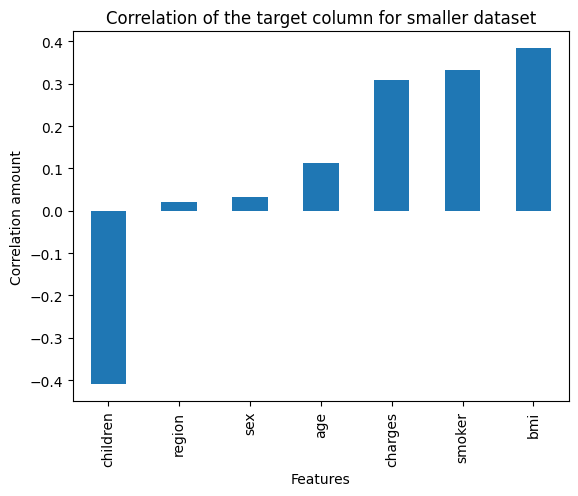

In [ ]:
plt.title("Correlation of the target column for smaller dataset")
plt.ylabel("Correlation amount")
plt.xlabel("Features")
df2.corr()['insuranceclaim'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df_merged = pd.merge(df, df2, on='region')

In [ ]:
df_merged

AGE_DESC COUNTY GEOCAT  GEOID                 IPR_DESC IPRCAT  \
0      Under 65 years    000    040  01000              All Incomes      0   
1      Under 65 years    000    040  01000              All Incomes      0   
2      Under 65 years    000    040  01000              All Incomes      0   
3      Under 65 years    000    040  01000              All Incomes      0   
4      Under 65 years    000    040  01000              All Incomes      0   
...               ...    ...    ...    ...                      ...    ...   
96799  Under 65 years    000    040  50000  138% to 400% of Poverty      5   
96800  Under 65 years    000    040  50000  138% to 400% of Poverty      5   
96801  Under 65 years    000    040  50000  138% to 400% of Poverty      5   
96802  Under 65 years    000    040  50000  138% to 400% of Poverty      5   
96803  Under 65 years    000    040  50000  138% to 400% of Poverty      5   

      region NIC_LB90 NIC_MOE   NIC_PT  ...  YEAR  time state age sex     bmi  \
0          2  3533978   14547  3548525  ...  2021  2021    01  18   1  33.770   
1          2  3533978   14547  3548525  ...  2021  2021    01  28   1  33.000   
2          2  3533978   14547  3548525  ...  2021  2021    01  31   0  25.740   
3          2  3533978   14547  3548525  ...  2021  2021    01  46   0  33.440   
4          2  3533978   14547  3548525  ...  2021  2021    01  62   0  26.290   
...      ...      ...     ...      ...  ...   ...   ...   ...  ..  ..     ...   
96799      0   175288    3481   178769  ...  2021  2021    50  62   1  26.695   
96800      0   175288    3481   178769  ...  2021  2021    50  61   1  33.535   
96801      0   175288    3481   178769  ...  2021  2021    50  42   0  32.870   
96802      0   175288    3481   178769  ...  2021  2021    50  23   0  24.225   
96803      0   175288    3481   178769  ...  2021  2021    50  18   0  31.920   

      children smoker      charges insuranceclaim  
0            1      0   1725.55230              1  
1            3      0   4449.46200              0  
2            0      0   3756.62160              0  
3            1      0   8240.58960              1  
4            0      1  27808.72510              1  
...        ...    ...          ...            ...  
96799        0      1  28101.33305              1  
96800        0      0  13143.33665              1  
96801        0      0   7050.02130              1  
96802        2      0  22395.74424              0  
96803        0      0   2205.98080              1  

[96804 rows x 42 columns]

In [ ]:
df_merged.columns

Index(['AGE_DESC', 'COUNTY', 'GEOCAT', 'GEOID', 'IPR_DESC', 'IPRCAT', 'region',
       'NIC_LB90', 'NIC_MOE', 'NIC_PT', 'NIC_UB90', 'NIPR_LB90', 'NIPR_MOE',
       'NIPR_PT', 'NIPR_UB90', 'NUI_LB90', 'NUI_MOE', 'NUI_PT', 'NUI_UB90',
       'PCTIC_LB90', 'PCTIC_MOE', 'PCTIC_PT', 'PCTIC_UB90', 'PCTUI_LB90',
       'PCTUI_MOE', 'PCTUI_PT', 'PCTUI_UB90', 'RACE_DESC', 'SEX_DESC',
       'STABREV', 'STATE', 'US', 'YEAR', 'time', 'state', 'age', 'sex', 'bmi',
       'children', 'smoker', 'charges', 'insuranceclaim'],
      dtype='object')

**Since the formula for calculating the correlation coefficient standardizes the variables, changes in scale or units of measurement will not affect its value. For this reason, normalizing will NOT affect the correlation.**

In [ ]:
df_merged['insuranceclaim'].unique()

array([1, 0])

In [ ]:
df_merged.drop(columns=['AGE_DESC','COUNTY','GEOCAT','GEOID','IPR_DESC',
                        'RACE_DESC','SEX_DESC','STABREV','US','YEAR','time',
                        'state'],axis=1, inplace=True)

In [ ]:
df_merged.drop(columns='STATE',axis=1,inplace=True)

In [ ]:
df_merged

IPRCAT region NIC_LB90 NIC_MOE   NIC_PT NIC_UB90 NIPR_LB90 NIPR_MOE  \
0          0      2  3533978   14547  3548525  3563072   4018412        0   
1          0      2  3533978   14547  3548525  3563072   4018412        0   
2          0      2  3533978   14547  3548525  3563072   4018412        0   
3          0      2  3533978   14547  3548525  3563072   4018412        0   
4          0      2  3533978   14547  3548525  3563072   4018412        0   
...      ...    ...      ...     ...      ...      ...       ...      ...   
96799      5      0   175288    3481   178769   182250    186616     3435   
96800      5      0   175288    3481   178769   182250    186616     3435   
96801      5      0   175288    3481   178769   182250    186616     3435   
96802      5      0   175288    3481   178769   182250    186616     3435   
96803      5      0   175288    3481   178769   182250    186616     3435   

       NIPR_PT NIPR_UB90  ... PCTUI_MOE PCTUI_PT PCTUI_UB90 age sex     bmi  \
0      4018412   4018412  ...       0.4     11.7       12.1  18   1  33.770   
1      4018412   4018412  ...       0.4     11.7       12.1  28   1  33.000   
2      4018412   4018412  ...       0.4     11.7       12.1  31   0  25.740   
3      4018412   4018412  ...       0.4     11.7       12.1  46   0  33.440   
4      4018412   4018412  ...       0.4     11.7       12.1  62   0  26.290   
...        ...       ...  ...       ...      ...        ...  ..  ..     ...   
96799   190051    193486  ...       0.7      5.9        6.6  62   1  26.695   
96800   190051    193486  ...       0.7      5.9        6.6  61   1  33.535   
96801   190051    193486  ...       0.7      5.9        6.6  42   0  32.870   
96802   190051    193486  ...       0.7      5.9        6.6  23   0  24.225   
96803   190051    193486  ...       0.7      5.9        6.6  18   0  31.920   

      children smoker      charges insuranceclaim  
0            1      0   1725.55230              1  
1            3      0   4449.46200              0  
2            0      0   3756.62160              0  
3            1      0   8240.58960              1  
4            0      1  27808.72510              1  
...        ...    ...          ...            ...  
96799        0      1  28101.33305              1  
96800        0      0  13143.33665              1  
96801        0      0   7050.02130              1  
96802        2      0  22395.74424              0  
96803        0      0   2205.98080              1  

[96804 rows x 29 columns]

<Axes: >

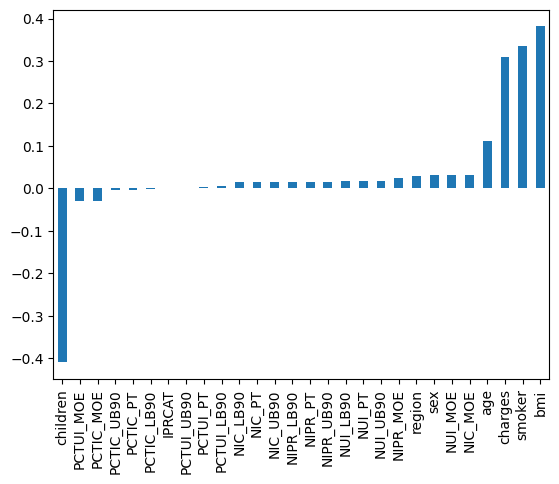

In [ ]:
df_merged.corr()['insuranceclaim'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df_merged.columns

Index(['IPRCAT', 'region', 'NIC_LB90', 'NIC_MOE', 'NIC_PT', 'NIC_UB90',
       'NIPR_LB90', 'NIPR_MOE', 'NIPR_PT', 'NIPR_UB90', 'NUI_LB90', 'NUI_MOE',
       'NUI_PT', 'NUI_UB90', 'PCTIC_LB90', 'PCTIC_MOE', 'PCTIC_PT',
       'PCTIC_UB90', 'PCTUI_LB90', 'PCTUI_MOE', 'PCTUI_PT', 'PCTUI_UB90',
       'age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'insuranceclaim'],
      dtype='object')

In [ ]:
df_merged.drop(columns=['PCTUI_LB90','PCTUI_LB90','PCTUI_UB90','IPRCAT','PCTIC_LB90',
                        'PCTIC_PT','PCTIC_UB90'],axis=1,inplace=True)

<Axes: title={'center': 'Correlation for the target class (Insurance Claim) wrt all the features in the final dataset'}, xlabel='Features', ylabel='Correlation scores'>

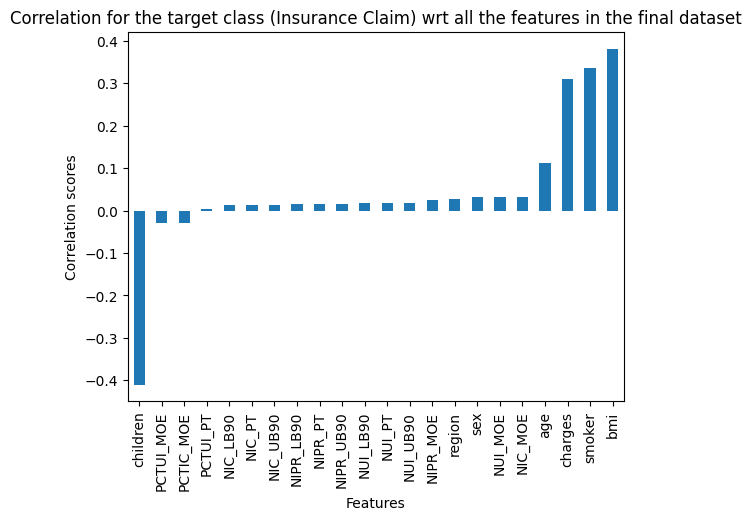

In [ ]:
plt.title("Correlation for the target class (Insurance Claim) wrt all the features in the final dataset")
plt.ylabel("Correlation scores")
plt.xlabel("Features")
df_merged.corr()['insuranceclaim'].sort_values()[:-1].plot(kind='bar')

In [ ]:
df_merged

region NIC_LB90 NIC_MOE   NIC_PT NIC_UB90 NIPR_LB90 NIPR_MOE  NIPR_PT  \
0          2  3533978   14547  3548525  3563072   4018412        0  4018412   
1          2  3533978   14547  3548525  3563072   4018412        0  4018412   
2          2  3533978   14547  3548525  3563072   4018412        0  4018412   
3          2  3533978   14547  3548525  3563072   4018412        0  4018412   
4          2  3533978   14547  3548525  3563072   4018412        0  4018412   
...      ...      ...     ...      ...      ...       ...      ...      ...   
96799      0   175288    3481   178769   182250    186616     3435   190051   
96800      0   175288    3481   178769   182250    186616     3435   190051   
96801      0   175288    3481   178769   182250    186616     3435   190051   
96802      0   175288    3481   178769   182250    186616     3435   190051   
96803      0   175288    3481   178769   182250    186616     3435   190051   

      NIPR_UB90 NUI_LB90  ... PCTIC_MOE PCTUI_MOE PCTUI_PT age sex     bmi  \
0       4018412   455340  ...       0.4       0.4     11.7  18   1  33.770   
1       4018412   455340  ...       0.4       0.4     11.7  28   1  33.000   
2       4018412   455340  ...       0.4       0.4     11.7  31   0  25.740   
3       4018412   455340  ...       0.4       0.4     11.7  46   0  33.440   
4       4018412   455340  ...       0.4       0.4     11.7  62   0  26.290   
...         ...      ...  ...       ...       ...      ...  ..  ..     ...   
96799    193486     9971  ...       0.7       0.7      5.9  62   1  26.695   
96800    193486     9971  ...       0.7       0.7      5.9  61   1  33.535   
96801    193486     9971  ...       0.7       0.7      5.9  42   0  32.870   
96802    193486     9971  ...       0.7       0.7      5.9  23   0  24.225   
96803    193486     9971  ...       0.7       0.7      5.9  18   0  31.920   

       children  smoker      charges  insuranceclaim  
0             1       0   1725.55230               1  
1             3       0   4449.46200               0  
2             0       0   3756.62160               0  
3             1       0   8240.58960               1  
4             0       1  27808.72510               1  
...         ...     ...          ...             ...  
96799         0       1  28101.33305               1  
96800         0       0  13143.33665               1  
96801         0       0   7050.02130               1  
96802         2       0  22395.74424               0  
96803         0       0   2205.98080               1  

[96804 rows x 23 columns]

In [ ]:
df_merged = df_merged.astype(float)

In [ ]:
df_merged.to_csv("Insurance_Data_final.csv", index=False)

In [ ]:
import pandas as pd
df_merged = pd.read_csv("/content/Insurance_Data_final.csv")

# **Visualizations:**

1. Insurance Claims Distributed by Age

In [ ]:
import seaborn as sns

In [ ]:
#Dataframe is copied to help in visualisations.
df_viz = df_merged

In [ ]:
bins = [18, 30, 45, 60, 100]
labels = ['18-30', '31-45', '46-60', '61+']
df_viz['age_group'] = pd.cut(df_merged['age'], bins=bins, labels=labels, right=False)

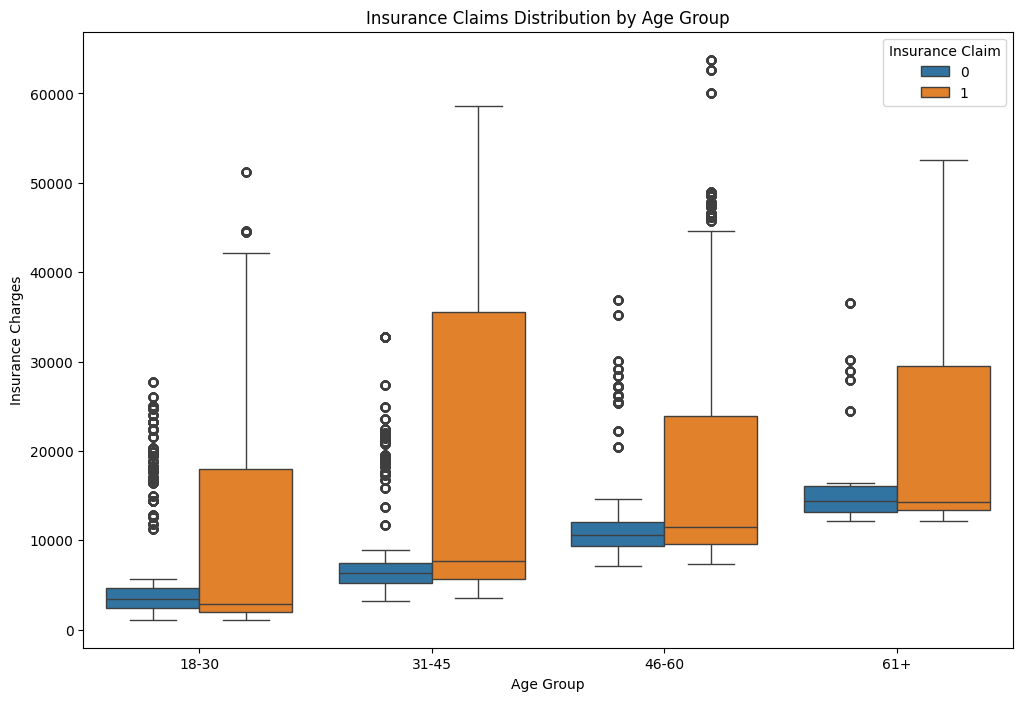

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='age_group', y='charges', hue='insuranceclaim', data=df_viz)
plt.title('Insurance Claims Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Insurance Charges')
plt.legend(title='Insurance Claim', loc='upper right')
plt.show()

Median Charges: Determine which age group has the highest or lowest median insurance charges.
Quartile Ranges: Observe the spread of insurance charges within each age group to identify variability.
Outliers: Identify age groups with significant outliers in insurance charges, which may suggest special cases or anomalies.

2. Impact on smoking on Insurance Claims

<ipython-input-67-b5a13d572883>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='charges', data=average_charges, palette='rocket')


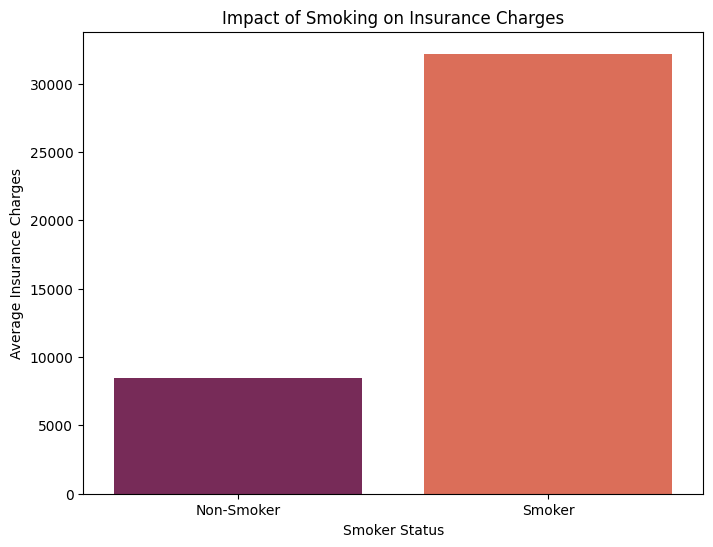

In [ ]:
average_charges = df_viz.groupby('smoker')['charges'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=average_charges, palette='rocket')
plt.title('Impact of Smoking on Insurance Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Average Insurance Charges')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

Need to mention the explanation:

------

3. Average Insurance Claim Probability by Region

<ipython-input-68-abf892d17876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='region', y='insuranceclaim', data=avg_claim_prob, palette='rocket')
<ipython-input-68-abf892d17876>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels([region_mapping[int(x.get_text())] for x in barplot.get_xticklabels()])


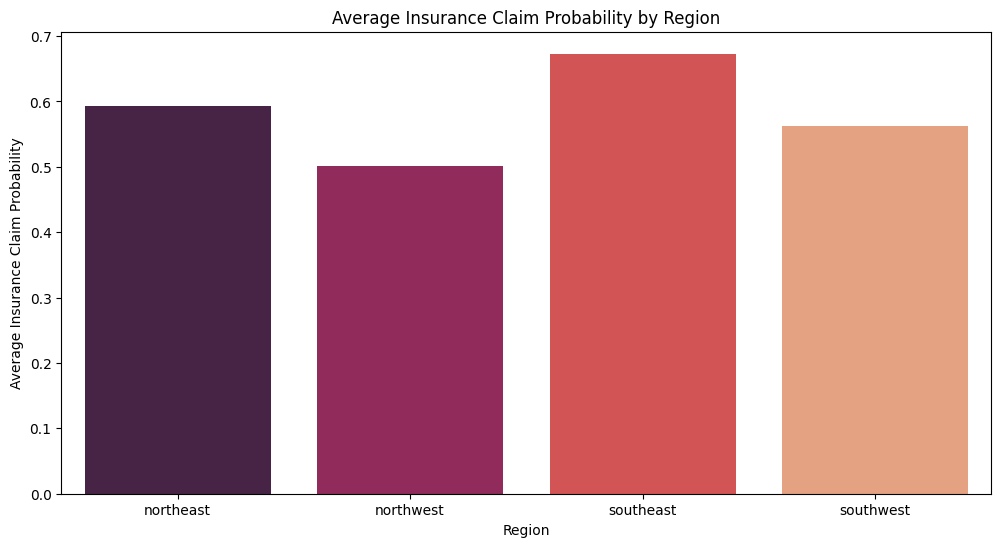

In [ ]:
avg_claim_prob = df_viz.groupby('region')['insuranceclaim'].mean().reset_index()

region_mapping = {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='region', y='insuranceclaim', data=avg_claim_prob, palette='rocket')

barplot.set_xticklabels([region_mapping[int(x.get_text())] for x in barplot.get_xticklabels()])

plt.title('Average Insurance Claim Probability by Region')
plt.xlabel('Region')
plt.ylabel('Average Insurance Claim Probability')
plt.show()

4. Insurance Claim Amounts by Region (Violin Plot)

<ipython-input-69-bb64c7e29b9c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='charges', data=df_viz, palette='viridis')


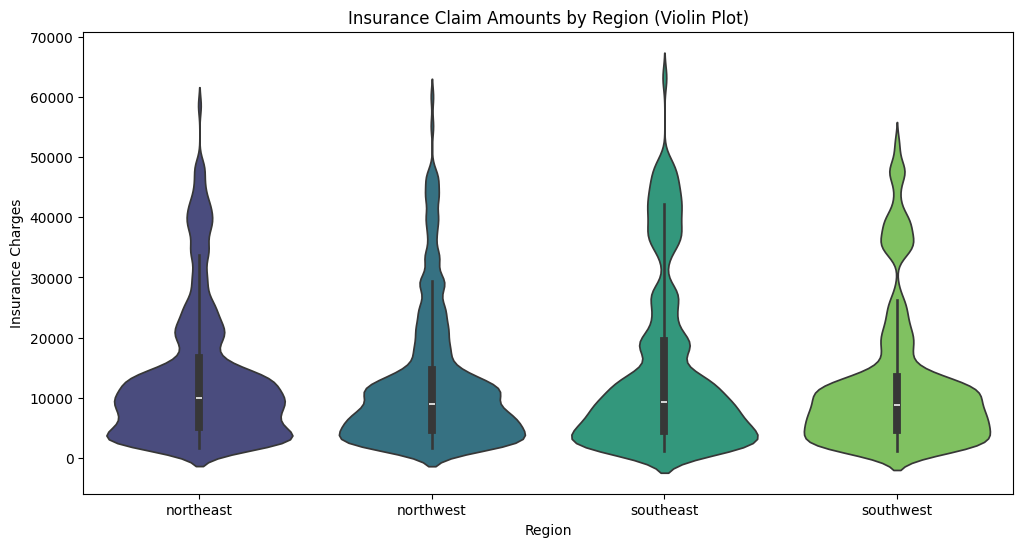

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='region', y='charges', data=df_viz, palette='viridis')

#Region labels (northeast=0, northwest=1, southeast=2, southwest=3)
plt.xticks(ticks=[0, 1, 2, 3], labels=[region_mapping[0], region_mapping[1], region_mapping[2], region_mapping[3]])

plt.title('Insurance Claim Amounts by Region (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()

5.  BMI Distribution by Insurance Claim Status (Density Plot)

<ipython-input-70-1ef177143954>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_viz[df_viz['insuranceclaim'] == 0]['bmi'], label='Non-Claimants', shade=True, color='blue')
<ipython-input-70-1ef177143954>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_viz[df_viz['insuranceclaim'] == 1]['bmi'], label='Claimants', shade=True, color='red')


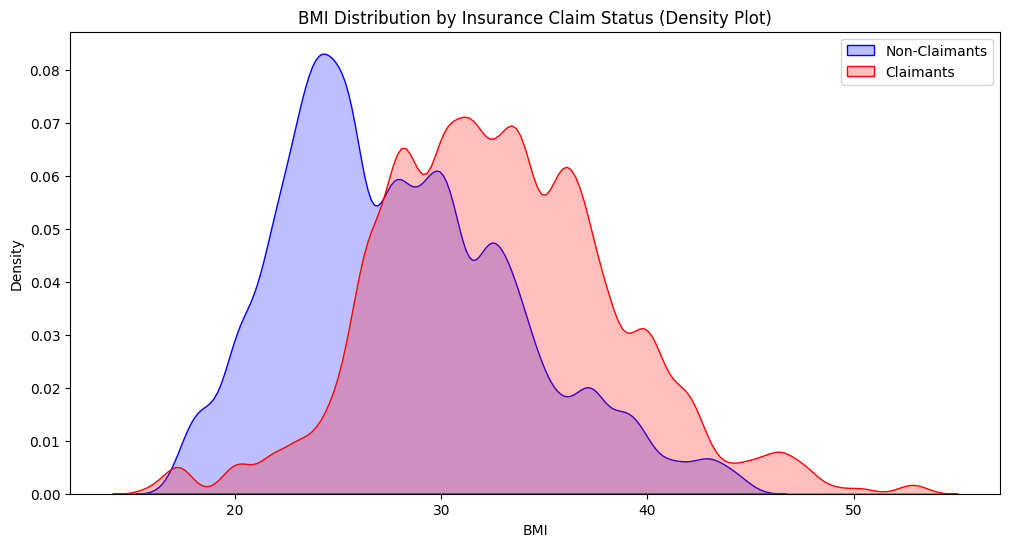

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_viz[df_viz['insuranceclaim'] == 0]['bmi'], label='Non-Claimants', shade=True, color='blue')
sns.kdeplot(data=df_viz[df_viz['insuranceclaim'] == 1]['bmi'], label='Claimants', shade=True, color='red')

plt.title('BMI Distribution by Insurance Claim Status (Density Plot)')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

6. Insurance Charges by Number of Children (Strip Plot)

<ipython-input-71-39186ac7a45a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='children', y='charges', data=df_viz, jitter=True, palette='Set2')


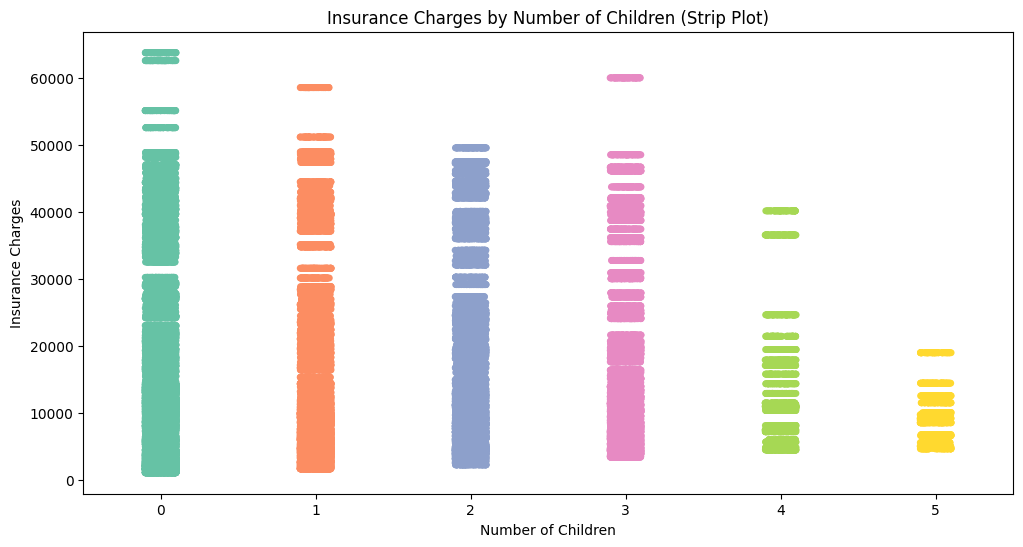

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='children', y='charges', data=df_viz, jitter=True, palette='Set2')

# Add labels
plt.title('Insurance Charges by Number of Children (Strip Plot)')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()

7. Correlation Heatmap for better uderstanding

In [ ]:
df_merged.drop(columns=['age_group'],axis=1,inplace=True)

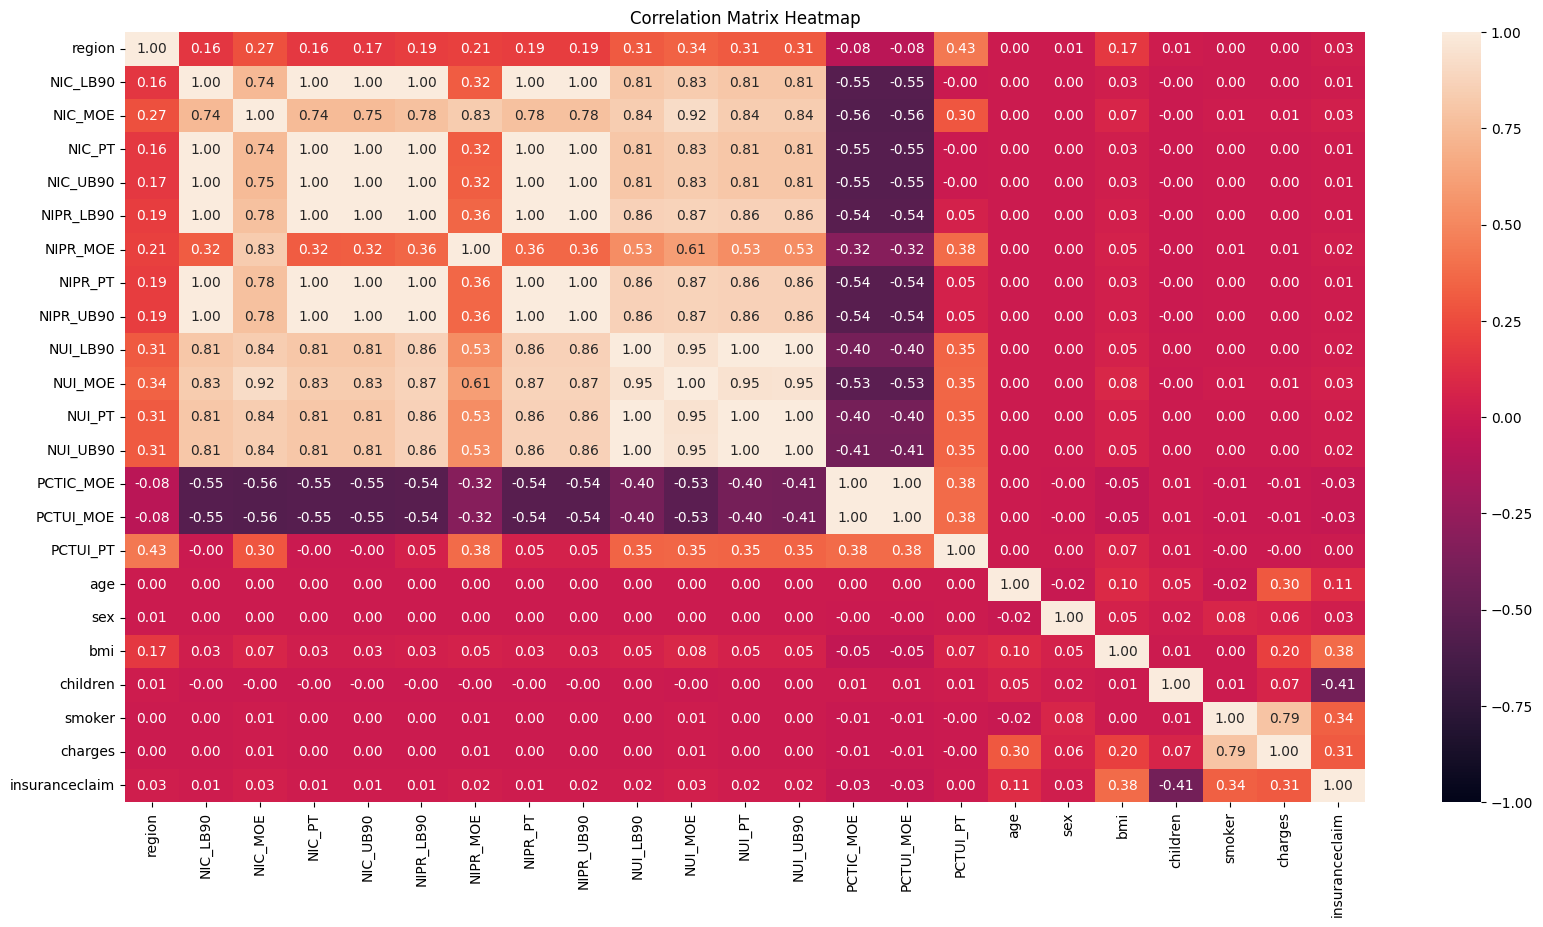

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_viz.corr(), annot=True, cmap='rocket', fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()

8.

In [ ]:
type(df_merged['NIC_PT'][0])

str

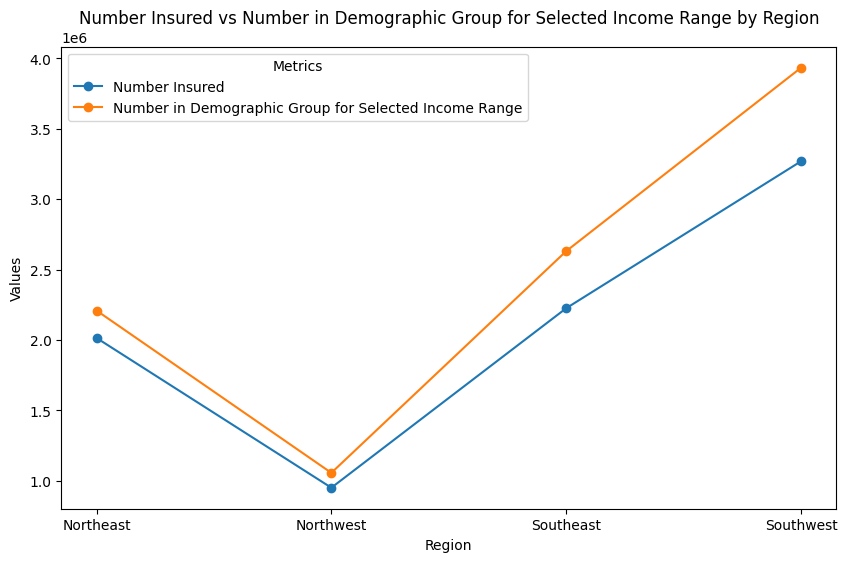

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

region_data = df_merged.groupby('region')[['NIC_PT', 'NIPR_PT']].mean().reset_index()

region_labels = {0: 'Northeast', 1: 'Northwest', 2: 'Southeast', 3: 'Southwest'}

plt.figure(figsize=(10, 6))
plt.plot(region_data['region'], region_data['NIC_PT'], label='Number Insured', marker='o')
plt.plot(region_data['region'], region_data['NIPR_PT'], label='Number in Demographic Group for Selected Income Range', marker='o')

plt.title('Number Insured vs Number in Demographic Group for Selected Income Range by Region')
plt.xlabel('Region')
plt.ylabel('Values')
plt.legend(title='Metrics')

plt.xticks(ticks=[0, 1, 2, 3], labels=[region_labels[0], region_labels[1], region_labels[2], region_labels[3]])

plt.show()

# **PCA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_final = pd.read_csv("/content/Insurance_Data_final-2.csv")

In [ ]:
df_final

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
0         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
1         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
2         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
3         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
4         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
...       ...        ...      ...        ...        ...        ...       ...   
96799     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96800     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96801     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96802     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96803     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  PCTIC_MOE  PCTUI_MOE  PCTUI_PT  \
0      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
1      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
2      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
3      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
4      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
...          ...        ...       ...  ...        ...        ...       ...   
96799   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96800   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96801   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96802   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96803   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   

        age  sex     bmi  children  smoker      charges  insuranceclaim  
0      18.0  1.0  33.770       1.0     0.0   1725.55230             1.0  
1      28.0  1.0  33.000       3.0     0.0   4449.46200             0.0  
2      31.0  0.0  25.740       0.0     0.0   3756.62160             0.0  
3      46.0  0.0  33.440       1.0     0.0   8240.58960             1.0  
4      62.0  0.0  26.290       0.0     1.0  27808.72510             1.0  
...     ...  ...     ...       ...     ...          ...             ...  
96799  62.0  1.0  26.695       0.0     1.0  28101.33305             1.0  
96800  61.0  1.0  33.535       0.0     0.0  13143.33665             1.0  
96801  42.0  0.0  32.870       0.0     0.0   7050.02130             1.0  
96802  23.0  0.0  24.225       2.0     0.0  22395.74424             0.0  
96803  18.0  0.0  31.920       0.0     0.0   2205.98080             1.0  

[96804 rows x 23 columns]

In [ ]:
X = df_final.drop(columns=['insuranceclaim'])
y = df_final['insuranceclaim']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
standardized_df = scaler.fit_transform(X)

In [ ]:
standardized_df = pd.DataFrame(standardized_df, columns = X.columns)

In [ ]:
standardized_df

region  NIC_LB90   NIC_MOE    NIC_PT  NIC_UB90  NIPR_LB90  NIPR_MOE  \
0      0.490351  0.476687 -0.011460  0.475361  0.474039   0.452967 -1.032954   
1      0.490351  0.476687 -0.011460  0.475361  0.474039   0.452967 -1.032954   
2      0.490351  0.476687 -0.011460  0.475361  0.474039   0.452967 -1.032954   
3      0.490351  0.476687 -0.011460  0.475361  0.474039   0.452967 -1.032954   
4      0.490351  0.476687 -0.011460  0.475361  0.474039   0.452967 -1.032954   
...         ...       ...       ...       ...       ...        ...       ...   
96799 -1.387485 -0.610861 -0.996444 -0.612830 -0.614784  -0.618697 -0.741803   
96800 -1.387485 -0.610861 -0.996444 -0.612830 -0.614784  -0.618697 -0.741803   
96801 -1.387485 -0.610861 -0.996444 -0.612830 -0.614784  -0.618697 -0.741803   
96802 -1.387485 -0.610861 -0.996444 -0.612830 -0.614784  -0.618697 -0.741803   
96803 -1.387485 -0.610861 -0.996444 -0.612830 -0.614784  -0.618697 -0.741803   

        NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
0      0.449025   0.445088  0.229347  ...   0.23999  -0.728618  -0.728618   
1      0.449025   0.445088  0.229347  ...   0.23999  -0.728618  -0.728618   
2      0.449025   0.445088  0.229347  ...   0.23999  -0.728618  -0.728618   
3      0.449025   0.445088  0.229347  ...   0.23999  -0.728618  -0.728618   
4      0.449025   0.445088  0.229347  ...   0.23999  -0.728618  -0.728618   
...         ...        ...       ...  ...       ...        ...        ...   
96799 -0.620407  -0.622108 -0.554084  ...  -0.56652   0.307385   0.307385   
96800 -0.620407  -0.622108 -0.554084  ...  -0.56652   0.307385   0.307385   
96801 -0.620407  -0.622108 -0.554084  ...  -0.56652   0.307385   0.307385   
96802 -0.620407  -0.622108 -0.554084  ...  -0.56652   0.307385   0.307385   
96803 -0.620407  -0.622108 -0.554084  ...  -0.56652   0.307385   0.307385   

       PCTUI_PT       age       sex       bmi  children    smoker   charges  
0     -0.322318 -1.507447  0.988047  0.484585 -0.075769 -0.512290 -0.953281  
1     -0.322318 -0.795882  0.988047  0.359475  1.589699 -0.512290 -0.730358  
2     -0.322318 -0.582413 -1.012097 -0.820134 -0.908502 -0.512290 -0.787060  
3     -0.322318  0.484935 -1.012097  0.430966 -0.075769 -0.512290 -0.420094  
4     -0.322318  1.623439 -1.012097 -0.730769 -0.908502  1.952018  1.181353  
...         ...       ...       ...       ...       ...       ...       ...  
96799 -1.390812  1.623439  0.988047 -0.664965 -0.908502  1.952018  1.205300  
96800 -1.390812  1.552283  0.988047  0.446402 -0.908502 -0.512290 -0.018855  
96801 -1.390812  0.200309 -1.012097  0.338352 -0.908502 -0.512290 -0.517529  
96802 -1.390812 -1.151665 -1.012097 -1.066292  0.756965 -0.512290  0.738357  
96803 -1.390812 -1.507447 -1.012097  0.183996 -0.908502 -0.512290 -0.913963  

[96804 rows x 22 columns]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_2 = PCA(n_components=2)
pca_2_df = pca_2.fit_transform(standardized_df)

pca_3 = PCA(n_components=3)
pca_3_df = pca_3.fit_transform(standardized_df)

In [ ]:
pca_2_df

array([[ 1.29706674, -0.91189255],
       [ 1.29502111, -0.88812019],
       [ 1.27200778, -1.03102666],
       ...,
       [-2.49903426, -1.39059242],
       [-2.52346811, -1.48081804],
       [-2.50372913, -1.42732866]])

In [ ]:
pca_3_df

array([[ 1.29706674, -0.91189255, -1.13647384],
       [ 1.29502111, -0.88812019, -0.70721378],
       [ 1.27200778, -1.03102666, -1.3188878 ],
       ...,
       [-2.49903426, -1.39059242, -0.73446714],
       [-2.52346811, -1.48081804, -0.34396476],
       [-2.50372913, -1.42732866, -1.4618681 ]])

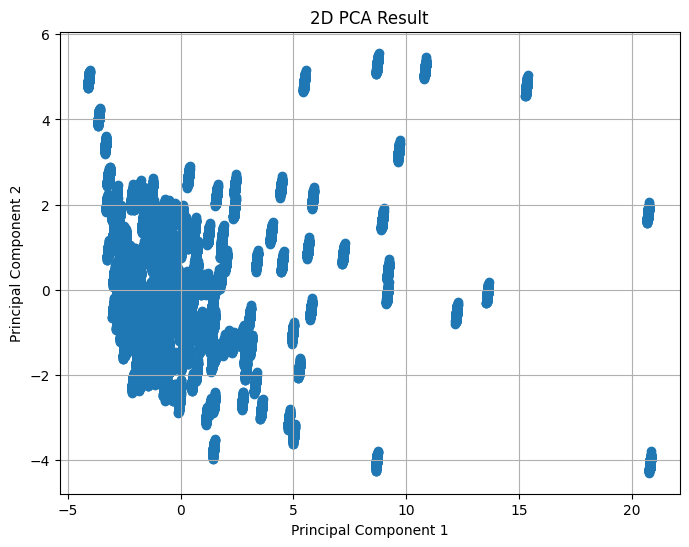

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_2_df[:, 0], pca_2_df[:, 1])
plt.title('2D PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

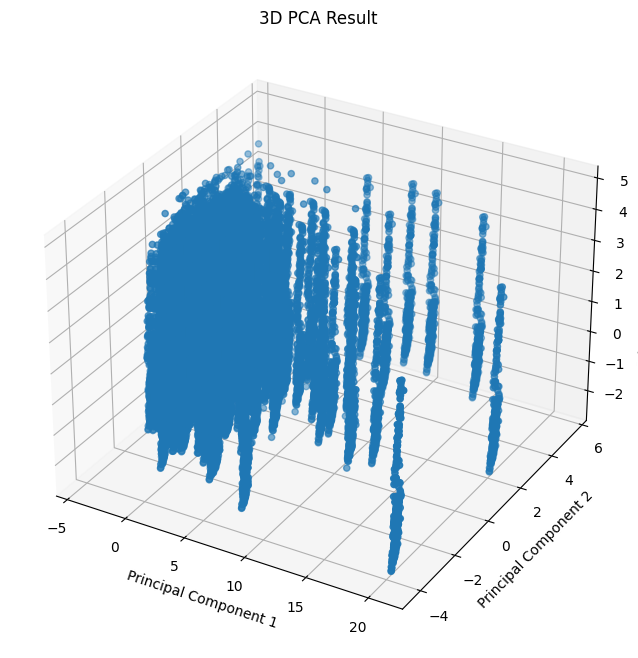

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3_df[:, 0], pca_3_df[:, 1], pca_3_df[:, 2])
ax.set_title('3D PCA Result')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

In [ ]:
explained_variance_2 = pca_2.explained_variance_ratio_
percentage_2 = sum(explained_variance_2) * 100
print("The percentage of information that has been retained in 2D: ", percentage_2)

The percentage of information that has been retained in 2D:  59.90567632132133


In [ ]:
explained_variance_3 = pca_3.explained_variance_ratio_
percentage_3 = sum(explained_variance_3) * 100
print("The percentage of information that has been retained in 3D: ", percentage_3)

The percentage of information that has been retained in 3D:  68.4860356568639


In [ ]:
#Dimensions required to retain 95% of the information

cumulative_variance = pca_3.explained_variance_ratio_.cumsum()
dimensions_95 = (cumulative_variance >= 0.95).argmax() + 1
print("Dimensions needed to retain 95% of the data: ", dimensions_95)

Dimensions needed to retain 95% of the data:  1


In [ ]:
#Top three eigenvalues from the data used

eigenvalues = pca_3.explained_variance_
top_3_eigenvalues = eigenvalues[:3]
print("The top 3 eigenvalues are: ", top_3_eigenvalues)

The top 3 eigenvalues are:  [10.92094036  2.25844458  1.88769855]


In [ ]:
pca_2_df = pd.DataFrame(pca_2_df, columns =['PC1','PC2'])

In [ ]:
pca_2_df

PC1       PC2
0      1.297067 -0.911893
1      1.295021 -0.888120
2      1.272008 -1.031027
3      1.296203 -0.898932
4      1.284453 -0.958716
...         ...       ...
96799 -2.505555 -1.409290
96800 -2.492966 -1.348612
96801 -2.499034 -1.390592
96802 -2.523468 -1.480818
96803 -2.503729 -1.427329

[96804 rows x 2 columns]

In [ ]:
pca_3_df = pd.DataFrame(pca_3_df, columns = ['PC1','PC2','PC3'])

In [ ]:
pca_3_df

PC1       PC2       PC3
0      1.297067 -0.911893 -1.136474
1      1.295021 -0.888120 -0.707214
2      1.272008 -1.031027 -1.318888
3      1.296203 -0.898932 -0.493904
4      1.284453 -0.958716  2.156652
...         ...       ...       ...
96799 -2.505555 -1.409290  2.372940
96800 -2.492966 -1.348612  0.177092
96801 -2.499034 -1.390592 -0.734467
96802 -2.523468 -1.480818 -0.343965
96803 -2.503729 -1.427329 -1.461868

[96804 rows x 3 columns]

# **Clustering**

In [ ]:
#Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X = pca_3_df[['PC1','PC2','PC3']]

In [ ]:
silhouette_scores = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

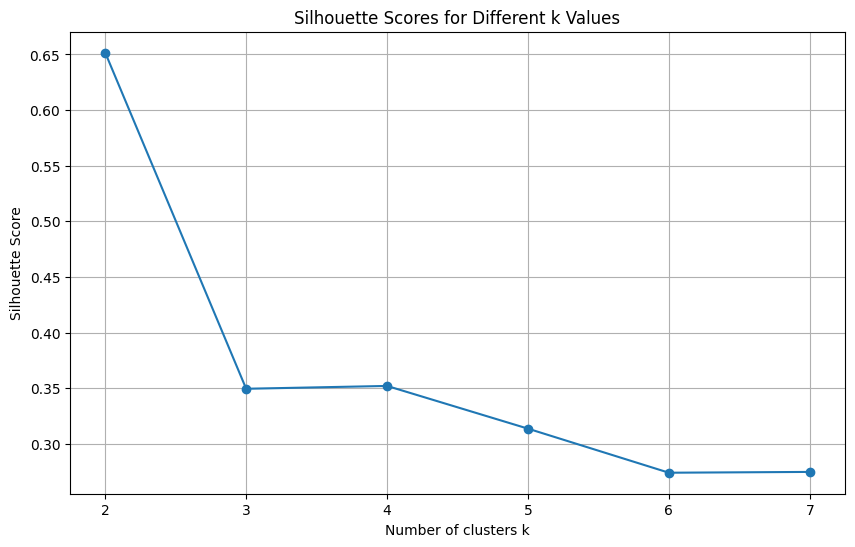

In [ ]:
K = range(2,8)
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

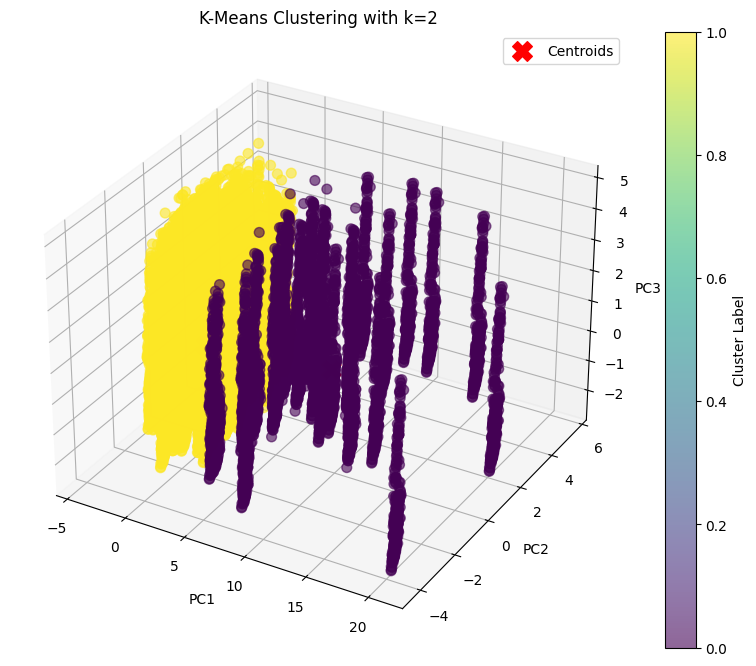

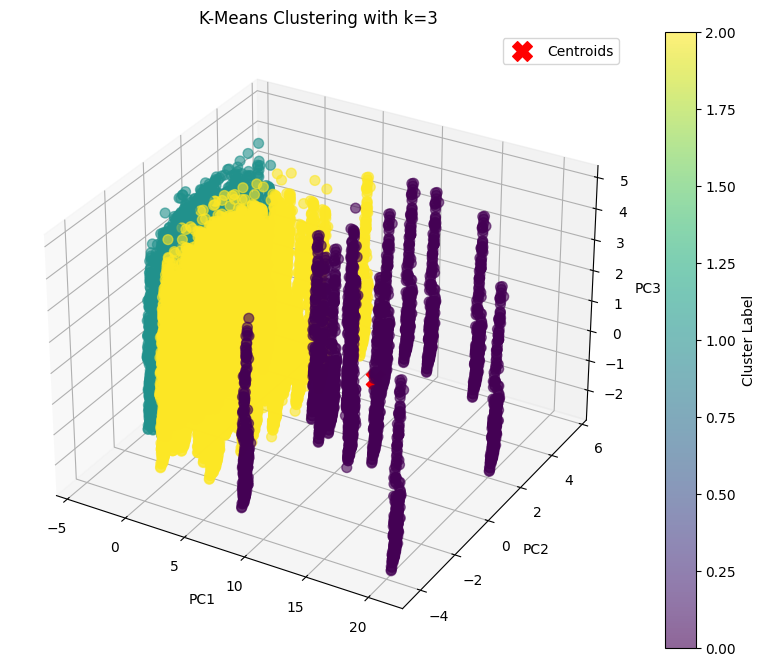

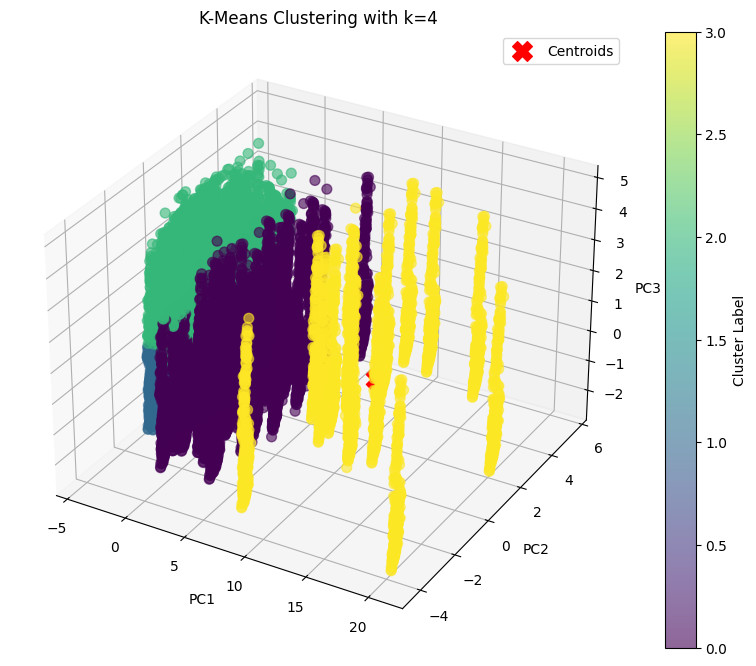

In [ ]:
k_values = [2 , 3, 4]  # Chosen k values based on silhouette scores

for k in k_values:
    # K-Means Clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_{k}'] = kmeans.fit_predict(X)  # Assign cluster labels to dataframe

    # 3D Visualization
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with colors based on cluster assignments
    scatter = ax.scatter(X['PC1'], X['PC2'], X['PC3'], c=df[f'Cluster_{k}'], cmap='viridis', alpha=0.6, s=50)

    # Plotting centroids
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Centroids')

    # Labels and title
    ax.set_title(f'K-Means Clustering with k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    # Add legend and color bar
    ax.legend()
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster Label')

    plt.show()


**Hierarchical Clustering**

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
!pip install fastcluster

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 5.5 MB/s eta 0:00:00


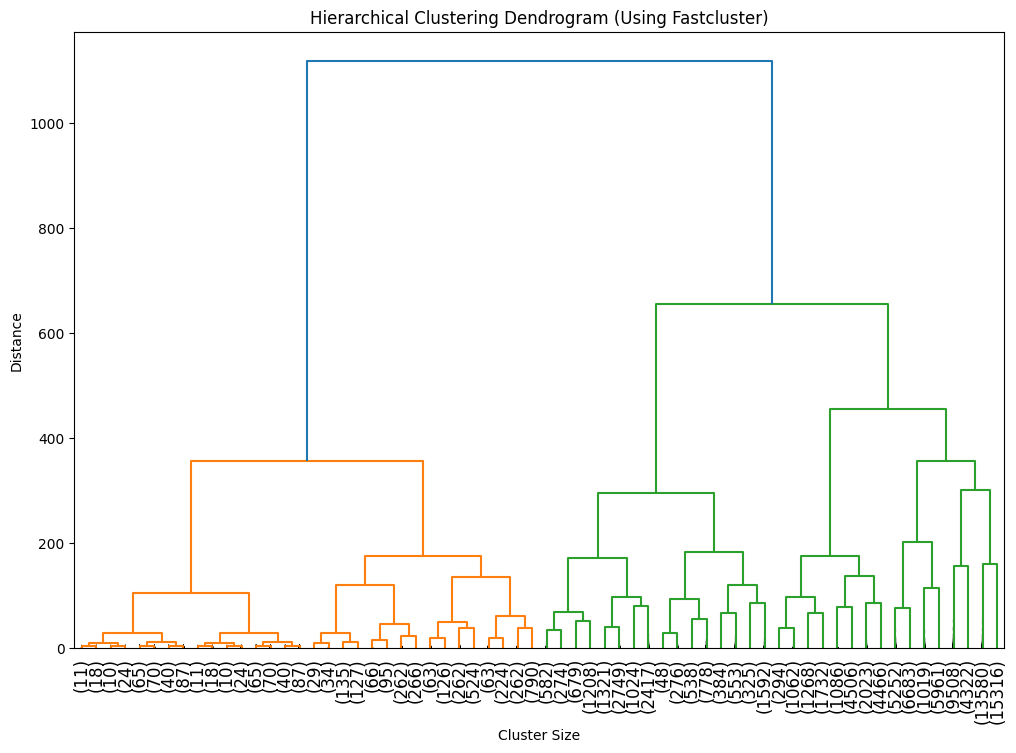

In [ ]:
import fastcluster

# Perform Hierarchical Clustering using the 'ward' method with fastcluster
Z = fastcluster.linkage_vector(X, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='level', p=5, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Using Fastcluster)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


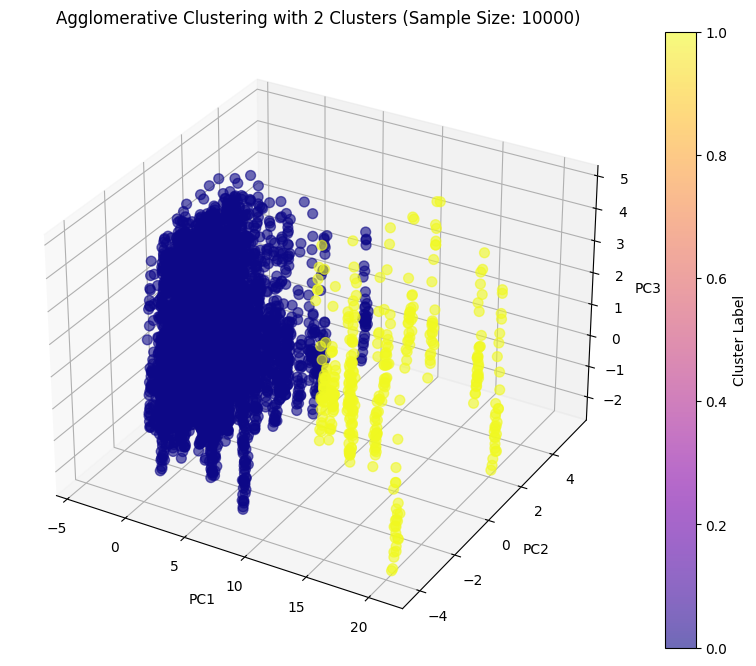

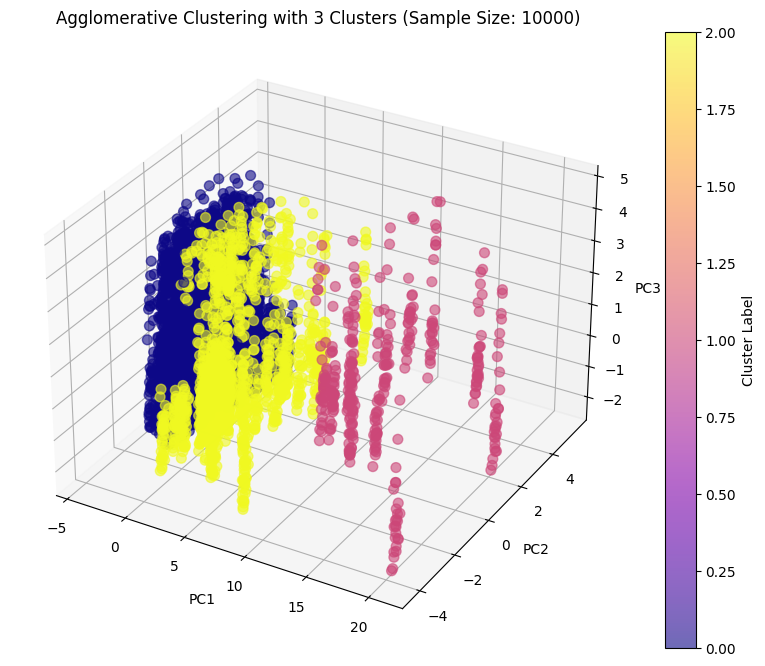

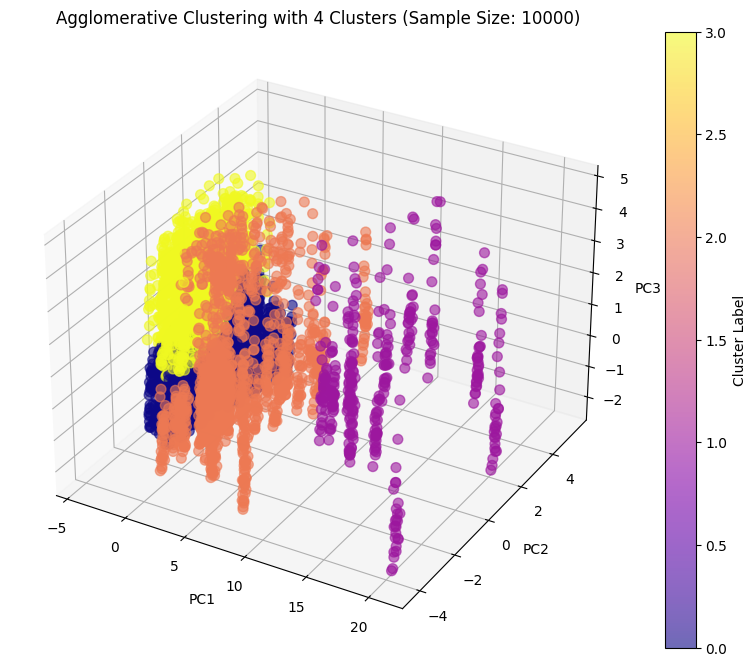

In [ ]:
import numpy as np

# If X is a pandas DataFrame, convert it to NumPy array
X_array = X.values if isinstance(X, pd.DataFrame) else X

# Downsample using the correct shape and avoid index error
sample_size = 10000  # Choose a reasonable sample size
X_sample = X_array[np.random.choice(X_array.shape[0], sample_size, replace=False), :]

# Perform clustering on the downsampled dataset
for n_clusters in [2, 3, 4]:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    cluster_labels = agg_clustering.fit_predict(X_sample)

    # Plot the 3D results
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_sample[:, 0], X_sample[:, 1], X_sample[:, 2], c=cluster_labels, cmap='plasma', alpha=0.6, s=50)

    ax.set_title(f'Agglomerative Clustering with {n_clusters} Clusters (Sample Size: {sample_size})')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster Label')

    plt.show()


**DBScan**

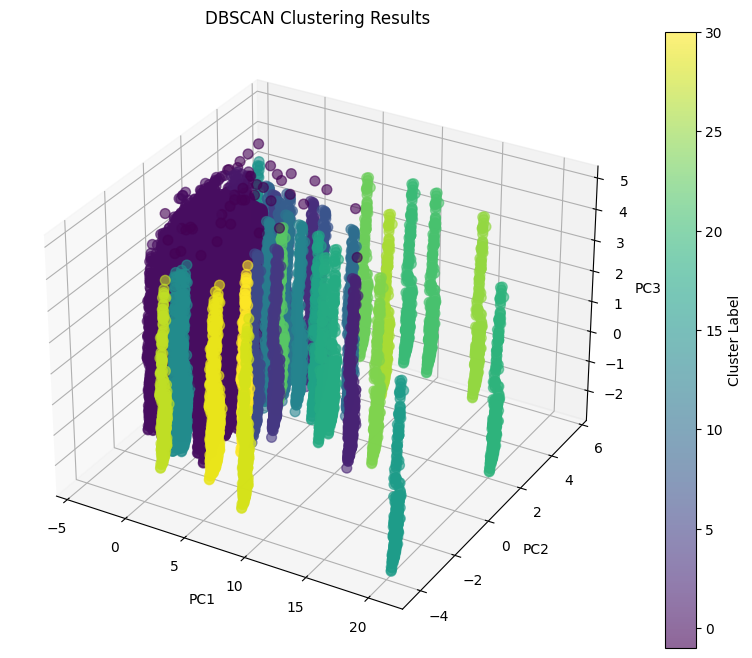

In [ ]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as necessary

# Fit DBSCAN to the data
clusters = dbscan.fit_predict(X)

# Add the cluster labels to the original dataset if X is a DataFrame
if isinstance(X, pd.DataFrame):
    X['DBSCAN_Cluster'] = clusters

# Visualize the results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['PC1'], X['PC2'], X['PC3'], c=clusters, cmap='viridis', alpha=0.6, s=50)

# Set labels and title
ax.set_title('DBSCAN Clustering Results')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Add a color bar to represent clusters
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Cluster Label')

plt.show()

# **Association Rule Mining (ARM)**

In [ ]:
df_final

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
0         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
1         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
2         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
3         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
4         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
...       ...        ...      ...        ...        ...        ...       ...   
96799     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96800     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96801     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96802     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96803     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  PCTIC_MOE  PCTUI_MOE  PCTUI_PT  \
0      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
1      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
2      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
3      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
4      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
...          ...        ...       ...  ...        ...        ...       ...   
96799   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96800   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96801   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96802   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96803   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   

        age  sex     bmi  children  smoker      charges  insuranceclaim  
0      18.0  1.0  33.770       1.0     0.0   1725.55230             1.0  
1      28.0  1.0  33.000       3.0     0.0   4449.46200             0.0  
2      31.0  0.0  25.740       0.0     0.0   3756.62160             0.0  
3      46.0  0.0  33.440       1.0     0.0   8240.58960             1.0  
4      62.0  0.0  26.290       0.0     1.0  27808.72510             1.0  
...     ...  ...     ...       ...     ...          ...             ...  
96799  62.0  1.0  26.695       0.0     1.0  28101.33305             1.0  
96800  61.0  1.0  33.535       0.0     0.0  13143.33665             1.0  
96801  42.0  0.0  32.870       0.0     0.0   7050.02130             1.0  
96802  23.0  0.0  24.225       2.0     0.0  22395.74424             0.0  
96803  18.0  0.0  31.920       0.0     0.0   2205.98080             1.0  

[96804 rows x 23 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import OneHotEncoder

columns = ['region', 'age', 'sex', 'bmi', 'children', 'smoker', 'insuranceclaim']

# Convert categorical variables into binary format
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_final[columns]).toarray()

columns_encoded = encoder.get_feature_names_out(columns)
df_encoded = pd.DataFrame(encoded_data, columns=columns_encoded)

In [ ]:
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


region_0.0  region_1.0  region_2.0  region_3.0  age_18.0  age_19.0  \
0             0.0         0.0         1.0         0.0       1.0       0.0   
1             0.0         0.0         1.0         0.0       0.0       0.0   
2             0.0         0.0         1.0         0.0       0.0       0.0   
3             0.0         0.0         1.0         0.0       0.0       0.0   
4             0.0         0.0         1.0         0.0       0.0       0.0   
...           ...         ...         ...         ...       ...       ...   
96799         1.0         0.0         0.0         0.0       0.0       0.0   
96800         1.0         0.0         0.0         0.0       0.0       0.0   
96801         1.0         0.0         0.0         0.0       0.0       0.0   
96802         1.0         0.0         0.0         0.0       0.0       0.0   
96803         1.0         0.0         0.0         0.0       1.0       0.0   

       age_20.0  age_21.0  age_22.0  age_23.0  ...  children_0.0  \
0           0.0       0.0       0.0       0.0  ...           0.0   
1           0.0       0.0       0.0       0.0  ...           0.0   
2           0.0       0.0       0.0       0.0  ...           1.0   
3           0.0       0.0       0.0       0.0  ...           0.0   
4           0.0       0.0       0.0       0.0  ...           1.0   
...         ...       ...       ...       ...  ...           ...   
96799       0.0       0.0       0.0       0.0  ...           1.0   
96800       0.0       0.0       0.0       0.0  ...           1.0   
96801       0.0       0.0       0.0       0.0  ...           1.0   
96802       0.0       0.0       0.0       1.0  ...           0.0   
96803       0.0       0.0       0.0       0.0  ...           1.0   

       children_1.0  children_2.0  children_3.0  children_4.0  children_5.0  \
0               1.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           1.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               1.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
96799           0.0           0.0           0.0           0.0           0.0   
96800           0.0           0.0           0.0           0.0           0.0   
96801           0.0           0.0           0.0           0.0           0.0   
96802           0.0           1.0           0.0           0.0           0.0   
96803           0.0           0.0           0.0           0.0           0.0   

       smoker_0.0  smoker_1.0  insuranceclaim_0.0  insuranceclaim_1.0  
0             1.0         0.0                 0.0                 1.0  
1             1.0         0.0                 1.0                 0.0  
2             1.0         0.0                 1.0                 0.0  
3             1.0         0.0                 0.0                 1.0  
4             0.0         1.0                 0.0                 1.0  
...           ...         ...                 ...                 ...  
96799         0.0         1.0                 0.0                 1.0  
96800         1.0         0.0                 0.0                 1.0  
96801         1.0         0.0                 0.0                 1.0  
96802         1.0         0.0                 1.0                 0.0  
96803         1.0         0.0                 0.0                 1.0  

[96804 rows x 611 columns]

In [ ]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


support                                           itemsets
0    0.240982                                       (region_0.0)
1    0.241726                                       (region_1.0)
2    0.315855                                       (region_2.0)
3    0.201438                                       (region_3.0)
4    0.055907                                         (age_18.0)
..        ...                                                ...
788  0.014256  (sex_0.0, insuranceclaim_0.0, smoker_0.0, regi...
789  0.024792  (children_0.0, insuranceclaim_1.0, sex_1.0, sm...
790  0.011157  (sex_1.0, insuranceclaim_0.0, smoker_0.0, regi...
791  0.017727  (sex_0.0, age_18.0, children_0.0, insurancecla...
792  0.010785  (age_18.0, children_0.0, insuranceclaim_1.0, s...

[793 rows x 2 columns]

In [ ]:
# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules generated
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    antecedents           consequents  antecedent support  consequent support  \
0  (region_0.0)             (sex_1.0)            0.240982            0.506012   
1  (region_0.0)          (smoker_0.0)            0.240982            0.792116   
2  (region_0.0)  (insuranceclaim_1.0)            0.240982            0.590058   
3    (age_19.0)          (region_1.0)            0.047105            0.241726   
4  (region_1.0)             (sex_0.0)            0.241726            0.493988   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.121235    0.503086  0.994218 -0.000705    0.994112      -0.007604  
1  0.191149    0.793210  1.001381  0.000264    1.005290       0.001817  
2  0.142804    0.592593  1.004295  0.000611    1.006221       0.005634  
3  0.025288    0.536842  2.220874  0.013902    1.637183       0.576902  
4  0.121978    0.504615  1.021514  0.002569    1.021453       0.027774  


In [ ]:
# Function to print formatted rules
def print_formatted_rules(rules, metric_name):
    print(f"\n{'='*50}")
    print(f"Top 15 Rules by {metric_name}")
    print(f"{'='*50}\n")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))
    print(f"\n{'='*50}\n")

# Sort and extract top 15 rules for each metric
top_support = rules.nlargest(15, 'support')
top_confidence = rules.nlargest(15, 'confidence')
top_lift = rules.nlargest(15, 'lift')

# Print top 15 rules in a nice format for each metric
print_formatted_rules(top_support, 'Support')
print_formatted_rules(top_confidence, 'Confidence')
print_formatted_rules(top_lift, 'Lift')



Top 15 Rules by Support

                       antecedents          consequents  support  confidence     lift
                      (smoker_0.0)            (sex_0.0) 0.406595    0.513302 1.039098
                         (sex_0.0)         (smoker_0.0) 0.406595    0.823087 1.039098
                      (smoker_0.0) (insuranceclaim_1.0) 0.400521    0.505634 0.856922
              (insuranceclaim_1.0)         (smoker_0.0) 0.400521    0.678782 0.856922
              (insuranceclaim_0.0)         (smoker_0.0) 0.391595    0.955246 1.205943
                         (sex_1.0)         (smoker_0.0) 0.385521    0.761881 0.961831
              (insuranceclaim_1.0)       (children_0.0) 0.348457    0.590546 1.375667
                    (children_0.0) (insuranceclaim_1.0) 0.348457    0.811724 1.375667
                    (children_0.0)         (smoker_0.0) 0.341887    0.796419 1.005433
              (insuranceclaim_1.0)            (sex_1.0) 0.306186    0.518908 1.025484
                         (se

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


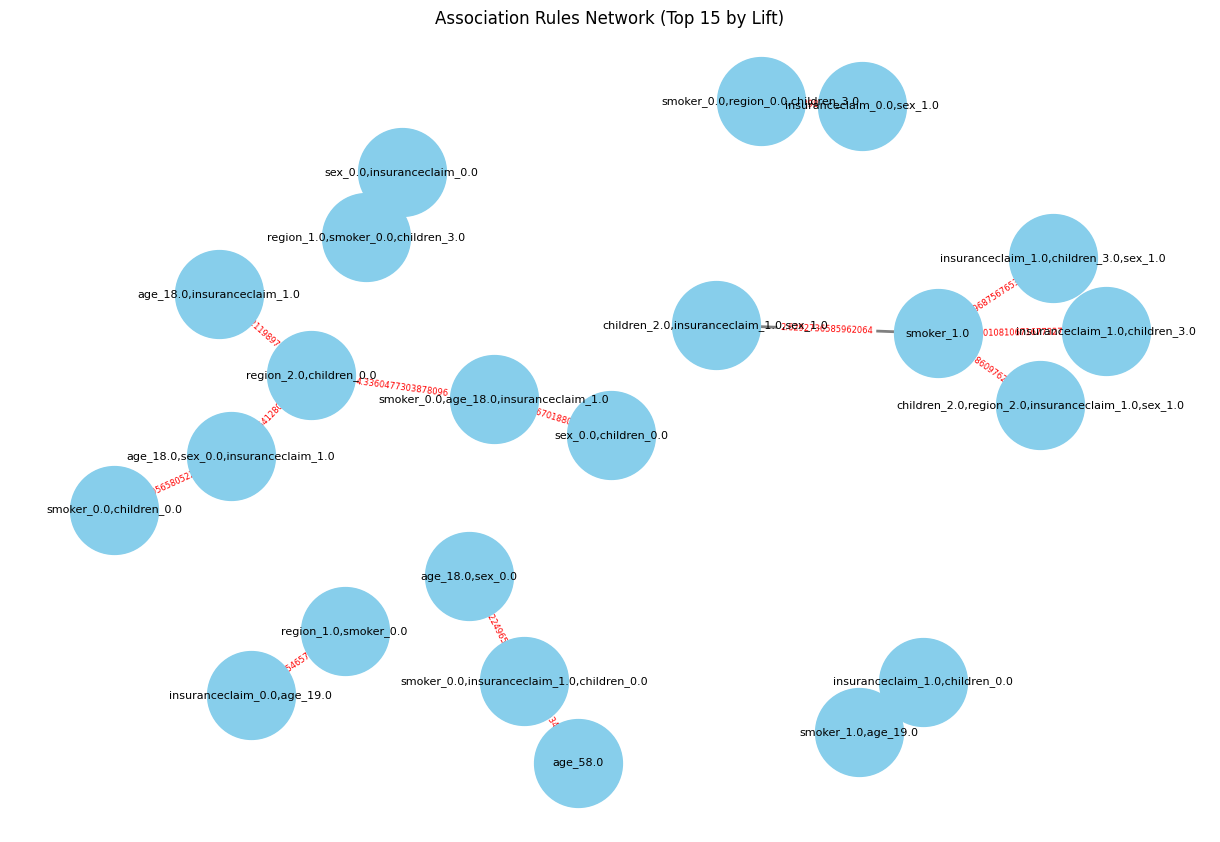

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Use the top 15 rules by lift (or you can use support/confidence)
top_lift_rules = rules.nlargest(15, 'lift')

# Convert antecedents and consequents into string format for better visualization
top_lift_rules['antecedents'] = top_lift_rules['antecedents'].apply(lambda x: ','.join(list(x)))
top_lift_rules['consequents'] = top_lift_rules['consequents'].apply(lambda x: ','.join(list(x)))

# Create a network graph from the top 15 rules
G = nx.from_pandas_edgelist(top_lift_rules, source='antecedents', target='consequents', edge_attr='lift')

# Set up plot with larger size
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust the k parameter to control spacing

# Draw the network graph
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=4000, font_size=8, edge_color='gray', width=2)

# Draw edge labels for lift
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

# Show plot
plt.title("Association Rules Network (Top 15 by Lift)")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


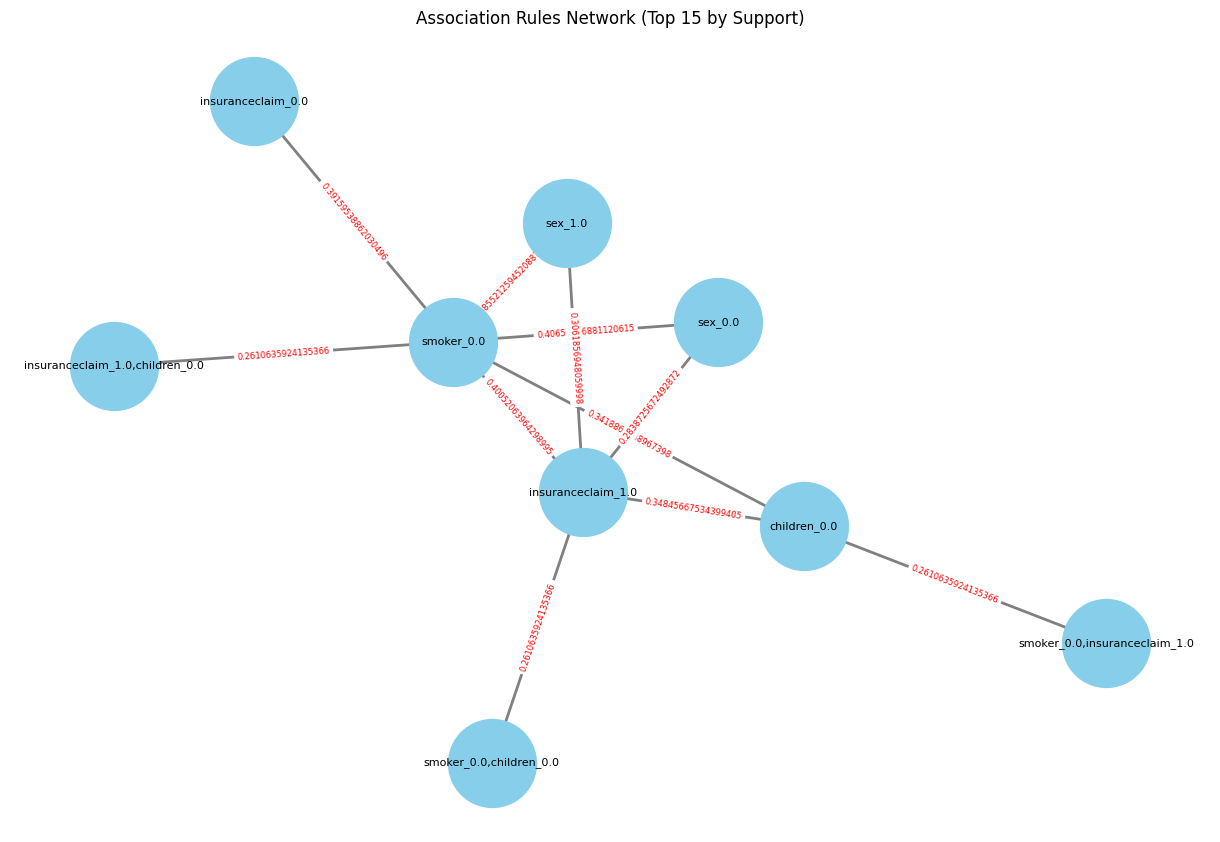

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Use the top 15 rules by support
top_support_rules = rules.nlargest(15, 'support')

# Convert antecedents and consequents into string format for better visualization
top_support_rules['antecedents'] = top_support_rules['antecedents'].apply(lambda x: ','.join(list(x)))
top_support_rules['consequents'] = top_support_rules['consequents'].apply(lambda x: ','.join(list(x)))

# Create a network graph from the top 15 rules
G = nx.from_pandas_edgelist(top_support_rules, source='antecedents', target='consequents', edge_attr='support')

# Set up plot with larger size
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust the k parameter to control spacing

# Draw the network graph
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=4000, font_size=8, edge_color='gray', width=2)

# Draw edge labels for support
edge_labels = nx.get_edge_attributes(G, 'support')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

# Show plot
plt.title("Association Rules Network (Top 15 by Support)")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


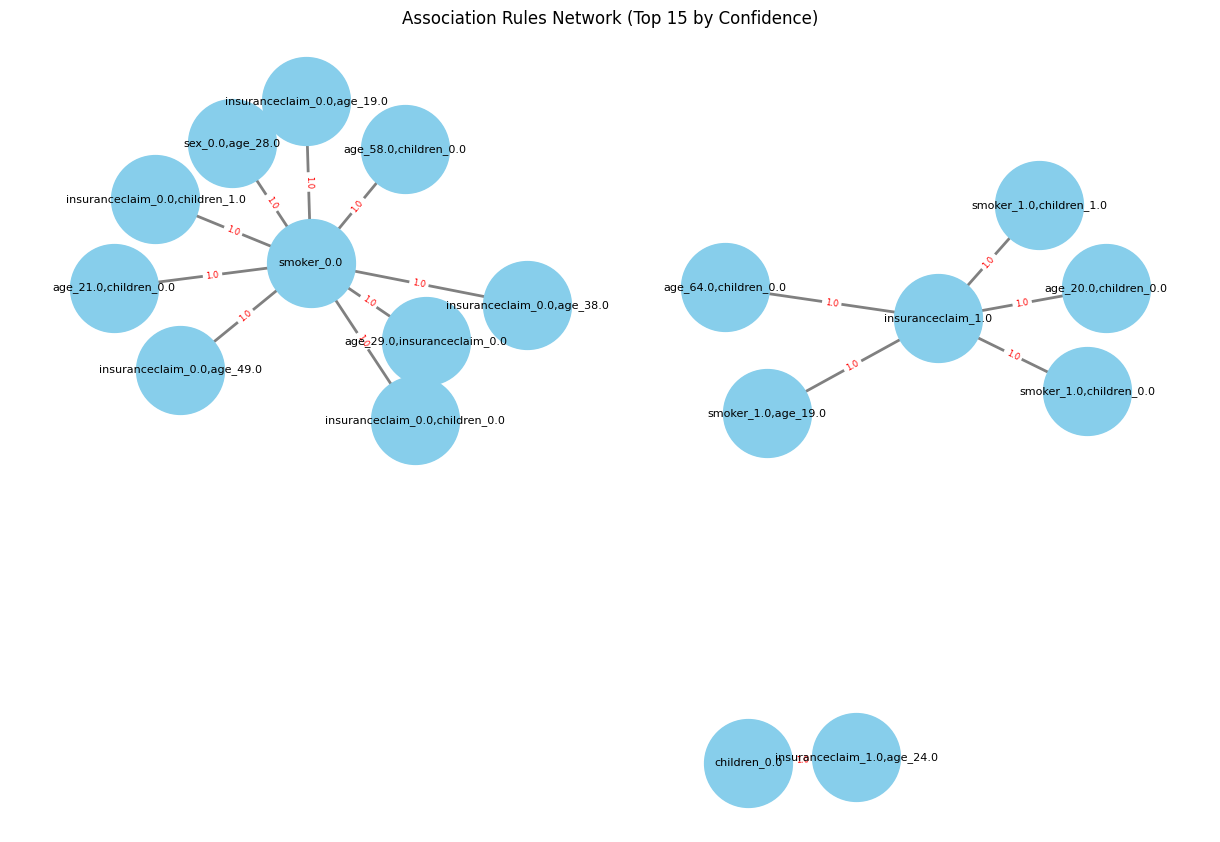

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Use the top 15 rules by confidence
top_confidence_rules = rules.nlargest(15, 'confidence')

# Convert antecedents and consequents into string format for better visualization
top_confidence_rules['antecedents'] = top_confidence_rules['antecedents'].apply(lambda x: ','.join(list(x)))
top_confidence_rules['consequents'] = top_confidence_rules['consequents'].apply(lambda x: ','.join(list(x)))

# Create a network graph from the top 15 rules
G = nx.from_pandas_edgelist(top_confidence_rules, source='antecedents', target='consequents', edge_attr='confidence')

# Set up plot with larger size
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust the k parameter to control spacing

# Draw the network graph
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=4000, font_size=8, edge_color='gray', width=2)

# Draw edge labels for confidence
edge_labels = nx.get_edge_attributes(G, 'confidence')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=6)

# Show plot
plt.title("Association Rules Network (Top 15 by Confidence)")
plt.show()


# **Naive Bayes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_final = pd.read_csv("/content/Insurance_Data_final-2.csv")

In [ ]:
df_final

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
0         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
1         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
2         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
3         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
4         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
...       ...        ...      ...        ...        ...        ...       ...   
96799     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96800     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96801     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96802     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96803     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  PCTIC_MOE  PCTUI_MOE  PCTUI_PT  \
0      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
1      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
2      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
3      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
4      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
...          ...        ...       ...  ...        ...        ...       ...   
96799   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96800   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96801   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96802   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96803   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   

        age  sex     bmi  children  smoker      charges  insuranceclaim  
0      18.0  1.0  33.770       1.0     0.0   1725.55230             1.0  
1      28.0  1.0  33.000       3.0     0.0   4449.46200             0.0  
2      31.0  0.0  25.740       0.0     0.0   3756.62160             0.0  
3      46.0  0.0  33.440       1.0     0.0   8240.58960             1.0  
4      62.0  0.0  26.290       0.0     1.0  27808.72510             1.0  
...     ...  ...     ...       ...     ...          ...             ...  
96799  62.0  1.0  26.695       0.0     1.0  28101.33305             1.0  
96800  61.0  1.0  33.535       0.0     0.0  13143.33665             1.0  
96801  42.0  0.0  32.870       0.0     0.0   7050.02130             1.0  
96802  23.0  0.0  24.225       2.0     0.0  22395.74424             0.0  
96803  18.0  0.0  31.920       0.0     0.0   2205.98080             1.0  

[96804 rows x 23 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, Binarizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = df_final.drop(columns=['insuranceclaim'],axis=1)
y = df_final['insuranceclaim']

In [ ]:
X

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
0         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
1         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
2         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
3         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
4         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
...       ...        ...      ...        ...        ...        ...       ...   
96799     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96800     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96801     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96802     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96803     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
0      4018412.0  4018412.0  455340.0  ...  484434.0        0.4        0.4   
1      4018412.0  4018412.0  455340.0  ...  484434.0        0.4        0.4   
2      4018412.0  4018412.0  455340.0  ...  484434.0        0.4        0.4   
3      4018412.0  4018412.0  455340.0  ...  484434.0        0.4        0.4   
4      4018412.0  4018412.0  455340.0  ...  484434.0        0.4        0.4   
...          ...        ...       ...  ...       ...        ...        ...   
96799   190051.0   193486.0    9971.0  ...   12593.0        0.7        0.7   
96800   190051.0   193486.0    9971.0  ...   12593.0        0.7        0.7   
96801   190051.0   193486.0    9971.0  ...   12593.0        0.7        0.7   
96802   190051.0   193486.0    9971.0  ...   12593.0        0.7        0.7   
96803   190051.0   193486.0    9971.0  ...   12593.0        0.7        0.7   

       PCTUI_PT   age  sex     bmi  children  smoker      charges  
0          11.7  18.0  1.0  33.770       1.0     0.0   1725.55230  
1          11.7  28.0  1.0  33.000       3.0     0.0   4449.46200  
2          11.7  31.0  0.0  25.740       0.0     0.0   3756.62160  
3          11.7  46.0  0.0  33.440       1.0     0.0   8240.58960  
4          11.7  62.0  0.0  26.290       0.0     1.0  27808.72510  
...         ...   ...  ...     ...       ...     ...          ...  
96799       5.9  62.0  1.0  26.695       0.0     1.0  28101.33305  
96800       5.9  61.0  1.0  33.535       0.0     0.0  13143.33665  
96801       5.9  42.0  0.0  32.870       0.0     0.0   7050.02130  
96802       5.9  23.0  0.0  24.225       2.0     0.0  22395.74424  
96803       5.9  18.0  0.0  31.920       0.0     0.0   2205.98080  

[96804 rows x 22 columns]

In [ ]:
y

0        1.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
96799    1.0
96800    1.0
96801    1.0
96802    0.0
96803    1.0
Name: insuranceclaim, Length: 96804, dtype: float64

In [ ]:
print("Data Types of All Columns:")
print(df_final.dtypes)
print("\n")

Data Types of All Columns:
region            float64
NIC_LB90          float64
NIC_MOE           float64
NIC_PT            float64
NIC_UB90          float64
NIPR_LB90         float64
NIPR_MOE          float64
NIPR_PT           float64
NIPR_UB90         float64
NUI_LB90          float64
NUI_MOE           float64
NUI_PT            float64
NUI_UB90          float64
PCTIC_MOE         float64
PCTUI_MOE         float64
PCTUI_PT          float64
age               float64
sex               float64
bmi               float64
children          float64
smoker            float64
charges           float64
insuranceclaim    float64
dtype: object




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
9364      2.0  6445018.0  16530.0  6461548.0  6478078.0  7020574.0       0.0   
28824     2.0  2186704.0  19328.0  2206032.0  2225360.0  2461124.0   19120.0   
37913     1.0    88099.0   3157.0    91256.0    94413.0   119553.0    3082.0   
47949     1.0   361481.0   5264.0   366745.0   372009.0   430302.0    4600.0   
16125     2.0    94019.0   3071.0    97090.0   100161.0    99655.0    3077.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
9364   7020574.0  7020574.0  542496.0  ...  575556.0        0.2        0.2   
28824  2480244.0  2499364.0  265076.0  ...  283348.0        0.4        0.4   
37913   122635.0   125717.0   29076.0  ...   33682.0        1.8        1.8   
47949   434902.0   439502.0   64588.0  ...   71726.0        0.8        0.8   
16125   102732.0   105809.0    4608.0  ...    6676.0        1.0        1.0   

       PCTUI_PT   age  sex    bmi  children  smoker     charges  
9364        8.0  50.0  0.0  46.09       1.0     0.0   9549.5651  
28824      11.1  60.0  0.0  38.06       0.0     0.0  12648.7034  
37913      25.6  33.0  0.0  42.94       3.0     0.0   6360.9936  
47949      15.7  39.0  1.0  26.22       1.0     0.0   6123.5688  
16125       5.5  47.0  1.0  47.52       1.0     0.0   8083.9198  

[5 rows x 22 columns]

In [ ]:
y_train.head()

9364     1.0
28824    1.0
37913    0.0
47949    0.0
16125    1.0
Name: insuranceclaim, dtype: float64

**Multinomial Naive Bayes**

In [ ]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_mn = X_train.copy()
X_test_mn = X_test.copy()
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_mn[numeric_features] = discretizer.fit_transform(X_train[numeric_features])
X_test_mn[numeric_features] = discretizer.transform(X_test[numeric_features])

In [ ]:
X_train_mn

region  NIC_LB90  NIC_MOE  NIC_PT  NIC_UB90  NIPR_LB90  NIPR_MOE  \
9364      3.0       1.0      1.0     1.0       1.0        1.0       0.0   
28824     3.0       0.0      1.0     0.0       0.0        0.0       1.0   
37913     1.0       0.0      0.0     0.0       0.0        0.0       0.0   
47949     1.0       0.0      0.0     0.0       0.0        0.0       0.0   
16125     3.0       0.0      0.0     0.0       0.0        0.0       0.0   
...       ...       ...      ...     ...       ...        ...       ...   
6265      3.0       0.0      1.0     0.0       0.0        0.0       0.0   
54886     4.0       0.0      1.0     0.0       0.0        0.0       1.0   
76820     0.0       0.0      0.0     0.0       0.0        0.0       0.0   
860       3.0       0.0      0.0     0.0       0.0        0.0       0.0   
15795     3.0       0.0      0.0     0.0       0.0        0.0       0.0   

       NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
9364       1.0        1.0       0.0  ...       0.0        0.0        0.0   
28824      0.0        0.0       0.0  ...       0.0        0.0        0.0   
37913      0.0        0.0       0.0  ...       0.0        4.0        4.0   
47949      0.0        0.0       0.0  ...       0.0        1.0        1.0   
16125      0.0        0.0       0.0  ...       0.0        2.0        2.0   
...        ...        ...       ...  ...       ...        ...        ...   
6265       0.0        0.0       0.0  ...       0.0        0.0        0.0   
54886      0.0        0.0       0.0  ...       0.0        1.0        1.0   
76820      0.0        0.0       0.0  ...       0.0        0.0        0.0   
860        0.0        0.0       0.0  ...       0.0        1.0        1.0   
15795      0.0        0.0       0.0  ...       0.0        1.0        1.0   

       PCTUI_PT  age  sex  bmi  children  smoker  charges  
9364        0.0  3.0  0.0  4.0       1.0     0.0      0.0  
28824       1.0  4.0  0.0  2.0       0.0     0.0      0.0  
37913       3.0  1.0  0.0  3.0       3.0     0.0      0.0  
47949       2.0  2.0  4.0  1.0       1.0     0.0      0.0  
16125       0.0  3.0  4.0  4.0       1.0     0.0      0.0  
...         ...  ...  ...  ...       ...     ...      ...  
6265        1.0  4.0  4.0  2.0       2.0     0.0      0.0  
54886       2.0  3.0  0.0  2.0       1.0     0.0      0.0  
76820       0.0  2.0  4.0  2.0       1.0     4.0      3.0  
860         0.0  3.0  4.0  2.0       2.0     0.0      0.0  
15795       2.0  2.0  0.0  2.0       0.0     0.0      0.0  

[64858 rows x 22 columns]

In [ ]:
mn_nb = MultinomialNB()
mn_nb.fit(X_train_mn, y_train)
y_pred_mn = mn_nb.predict(X_test_mn)

In [ ]:
mn_nb_accuracy = accuracy_score(y_test, y_pred_mn)
print(f"Multinomial NB Accuracy: {mn_nb_accuracy*100:.2f}")

Multinomial NB Accuracy: 72.89


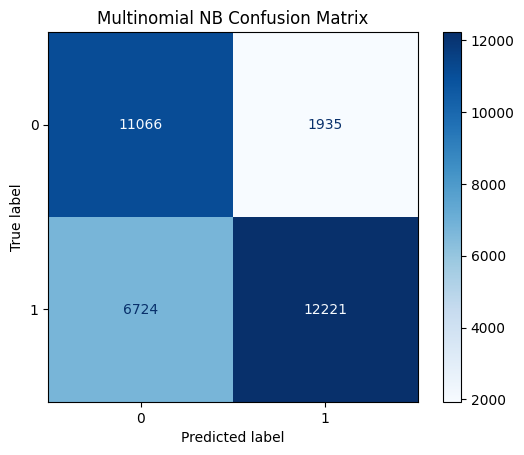

In [ ]:
cm_mn = confusion_matrix(y_test, y_pred_mn)
disp_mn = ConfusionMatrixDisplay(confusion_matrix=cm_mn)
disp_mn.plot(cmap='Blues')
plt.title("Multinomial NB Confusion Matrix")
plt.show()

**Bernoulli Naive Bayes**

In [ ]:
binarizer = Binarizer(threshold=0.5)
X_train_bn = X_train.copy()
X_test_bn = X_test.copy()
X_train_bn[numeric_features] = binarizer.fit_transform(X_train[numeric_features])
X_test_bn[numeric_features] = binarizer.transform(X_test[numeric_features])

In [ ]:
X_train_bn[numeric_features]

region  NIC_LB90  NIC_MOE  NIC_PT  NIC_UB90  NIPR_LB90  NIPR_MOE  \
9364      1.0       1.0      1.0     1.0       1.0        1.0       0.0   
28824     1.0       1.0      1.0     1.0       1.0        1.0       1.0   
37913     1.0       1.0      1.0     1.0       1.0        1.0       1.0   
47949     1.0       1.0      1.0     1.0       1.0        1.0       1.0   
16125     1.0       1.0      1.0     1.0       1.0        1.0       1.0   
...       ...       ...      ...     ...       ...        ...       ...   
6265      1.0       1.0      1.0     1.0       1.0        1.0       0.0   
54886     1.0       1.0      1.0     1.0       1.0        1.0       1.0   
76820     0.0       1.0      1.0     1.0       1.0        1.0       0.0   
860       1.0       1.0      1.0     1.0       1.0        1.0       0.0   
15795     1.0       1.0      1.0     1.0       1.0        1.0       1.0   

       NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
9364       1.0        1.0       1.0  ...       1.0        0.0        0.0   
28824      1.0        1.0       1.0  ...       1.0        0.0        0.0   
37913      1.0        1.0       1.0  ...       1.0        1.0        1.0   
47949      1.0        1.0       1.0  ...       1.0        1.0        1.0   
16125      1.0        1.0       1.0  ...       1.0        1.0        1.0   
...        ...        ...       ...  ...       ...        ...        ...   
6265       1.0        1.0       1.0  ...       1.0        0.0        0.0   
54886      1.0        1.0       1.0  ...       1.0        1.0        1.0   
76820      1.0        1.0       1.0  ...       1.0        0.0        0.0   
860        1.0        1.0       1.0  ...       1.0        0.0        0.0   
15795      1.0        1.0       1.0  ...       1.0        1.0        1.0   

       PCTUI_PT  age  sex  bmi  children  smoker  charges  
9364        1.0  1.0  0.0  1.0       1.0     0.0      1.0  
28824       1.0  1.0  0.0  1.0       0.0     0.0      1.0  
37913       1.0  1.0  0.0  1.0       1.0     0.0      1.0  
47949       1.0  1.0  1.0  1.0       1.0     0.0      1.0  
16125       1.0  1.0  1.0  1.0       1.0     0.0      1.0  
...         ...  ...  ...  ...       ...     ...      ...  
6265        1.0  1.0  1.0  1.0       1.0     0.0      1.0  
54886       1.0  1.0  0.0  1.0       1.0     0.0      1.0  
76820       1.0  1.0  1.0  1.0       1.0     1.0      1.0  
860         1.0  1.0  1.0  1.0       1.0     0.0      1.0  
15795       1.0  1.0  0.0  1.0       0.0     0.0      1.0  

[64858 rows x 22 columns]

In [ ]:
bn_nb = BernoulliNB()
bn_nb.fit(X_train_bn, y_train)
y_pred_bn = bn_nb.predict(X_test_bn)

In [ ]:
bn_nb_accuracy = accuracy_score(y_test, y_pred_bn)
print(f"Bernoulli NB Accuracy: {bn_nb_accuracy*100:.2f}")

Bernoulli NB Accuracy: 76.11


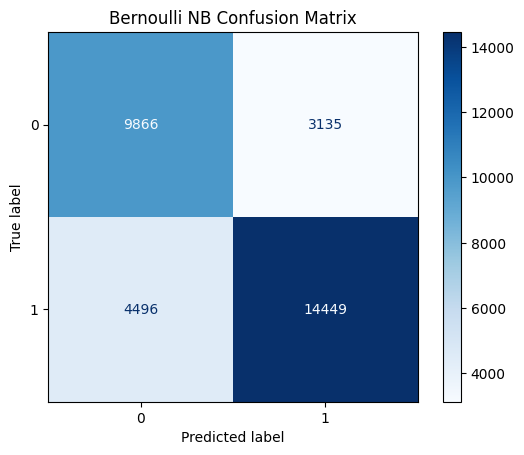

In [ ]:
cm_bn = confusion_matrix(y_test, y_pred_bn)
disp_bn = ConfusionMatrixDisplay(confusion_matrix=cm_bn)
disp_bn.plot(cmap='Blues')
plt.title("Bernoulli NB Confusion Matrix")
plt.show()

**Gaussian Naive Bayes**

In [ ]:
scaler = StandardScaler()
X_train_gnb = X_train.copy()
X_test_gnb = X_test.copy()
X_train_gnb[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_gnb[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
X_train_gnb

region  NIC_LB90   NIC_MOE    NIC_PT  NIC_UB90  NIPR_LB90  NIPR_MOE  \
9364   0.491678  1.410011  0.163755  1.406857  1.403711   1.287631 -1.036510   
28824  0.491678  0.038719  0.413619  0.040104  0.041481   0.016344  0.587165   
37913 -0.447070 -0.637089 -1.030469 -0.639103 -0.641103  -0.636544 -0.774786   
47949 -0.447070 -0.549052 -0.842311 -0.550624 -0.552184  -0.549899 -0.645877   
16125  0.491678 -0.635182 -1.038149 -0.637229 -0.639262  -0.642092 -0.775211   
...         ...       ...       ...       ...       ...        ...       ...   
6265   0.491678  0.747422  0.075704  0.745710  0.744002   0.715095 -1.036510   
54886  1.430427 -0.065222  0.442910 -0.063456 -0.061699  -0.024745  0.551159   
76820 -1.385818  1.077157 -0.482517  1.072562  1.067985   0.886916 -1.036510   
860    0.491678 -0.496326 -1.054401 -0.498801 -0.501259  -0.516930 -1.036510   
15795  0.491678 -0.503025 -0.421703 -0.503206 -0.503383  -0.502869 -0.174060   

        NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
9364   1.282742   1.277852  0.388241  ...  0.401330  -1.422512  -1.422512   
28824  0.018251   0.020153 -0.104722  ... -0.103129  -0.728233  -0.728233   
37913 -0.638348  -0.640142 -0.524084  ... -0.534145   4.131716   4.131716   
47949 -0.551381  -0.552854 -0.460980  ... -0.468467   0.660323   0.660323   
16125 -0.643891  -0.645680 -0.567562  ... -0.580767   1.354602   1.354602   
...         ...        ...       ...  ...       ...        ...        ...   
6265   0.710868   0.706645  0.399150  ...  0.408524  -1.075373  -1.075373   
54886 -0.022909  -0.021077  0.197576  ...  0.206217  -0.033955  -0.033955   
76820  0.882490   0.878067 -0.303105  ... -0.295322  -1.422512  -1.422512   
860   -0.519732  -0.522521 -0.544558  ... -0.552013  -0.381094  -0.381094   
15795 -0.502859  -0.502843 -0.416595  ... -0.419786   0.660323   0.660323   

       PCTUI_PT       age       sex       bmi  children    smoker   charges  
9364  -1.001588  0.769510 -1.010197  2.482336 -0.077260 -0.511284 -0.312283  
28824 -0.430573  1.479842 -1.010197  1.179457 -0.907567 -0.511284 -0.058387  
37913  2.240303 -0.438055 -1.010197  1.971244  1.583356 -0.511284 -0.573505  
47949  0.416739 -0.011856  0.989906 -0.741599 -0.077260 -0.511284 -0.592956  
16125 -1.462084  0.556410  0.989906  2.714355 -0.077260 -0.511284 -0.432355  
...         ...       ...       ...       ...       ...       ...       ...  
6265  -0.375314  1.408809  0.989906  0.162141  0.753048 -0.511284 -0.035441  
54886  1.061434  0.556410 -1.010197  0.196214 -0.077260 -0.511284 -0.394061  
76820 -1.941000  0.059178  0.989906  0.321958 -0.077260  1.955859  2.110699  
860   -1.793641  0.698477  0.989906  1.090219  0.753048 -0.511284 -0.332343  
15795  0.398319 -0.082889 -1.010197  1.125914 -0.907567 -0.511284 -0.652429  

[64858 rows x 22 columns]

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train)
y_pred_gnb = gnb.predict(X_test_gnb)

In [ ]:
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian NB Accuracy: {gnb_accuracy*100:.2f}")

Gaussian NB Accuracy: 72.43


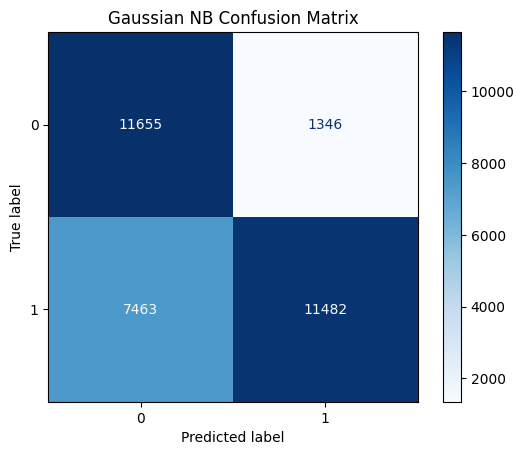

In [ ]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb)
disp_gnb.plot(cmap='Blues')
plt.title("Gaussian NB Confusion Matrix")
plt.show()

In [ ]:
print("Summary of Model Accuracies:")
print(f"Multinomial NB Accuracy: {mn_nb_accuracy*100:.2f}")
print(f"Bernoulli NB Accuracy: {bn_nb_accuracy*100:.2f}")
print(f"Gaussian NB Accuracy: {gnb_accuracy*100:.2f}")

Summary of Model Accuracies:
Multinomial NB Accuracy: 72.89
Bernoulli NB Accuracy: 76.11
Gaussian NB Accuracy: 72.43


<ipython-input-37-42a873fbe97b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


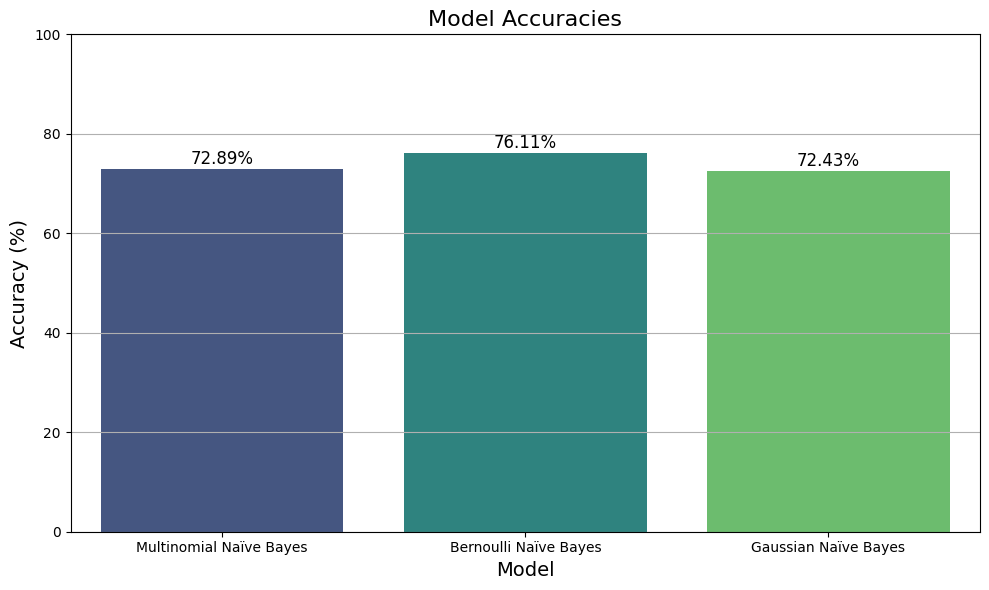

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model names and their accuracies
models = ['Multinomial Naïve Bayes', 'Bernoulli Naïve Bayes', 'Gaussian Naïve Bayes']
accuracies = [72.89, 76.11, 72.43]

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')

# Add labels and title
plt.title('Model Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', fontsize=12)

# Show the chart
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
9364      2.0  6445018.0  16530.0  6461548.0  6478078.0  7020574.0       0.0   
28824     2.0  2186704.0  19328.0  2206032.0  2225360.0  2461124.0   19120.0   
37913     1.0    88099.0   3157.0    91256.0    94413.0   119553.0    3082.0   
47949     1.0   361481.0   5264.0   366745.0   372009.0   430302.0    4600.0   
16125     2.0    94019.0   3071.0    97090.0   100161.0    99655.0    3077.0   
...       ...        ...      ...        ...        ...        ...       ...   
6265      2.0  4387460.0  15544.0  4403004.0  4418548.0  4967183.0       0.0   
54886     3.0  1863932.0  19656.0  1883588.0  1903244.0  2313759.0   18696.0   
76820     0.0  5411396.0   9293.0  5420689.0  5429982.0  5583416.0       0.0   
860       2.0   525212.0   2889.0   528101.0   530990.0   548544.0       0.0   
15795     2.0   504410.0   9974.0   514384.0   524358.0   598973.0   10156.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
9364   7020574.0  7020574.0  542496.0  ...  575556.0        0.2        0.2   
28824  2480244.0  2499364.0  265076.0  ...  283348.0        0.4        0.4   
37913   122635.0   125717.0   29076.0  ...   33682.0        1.8        1.8   
47949   434902.0   439502.0   64588.0  ...   71726.0        0.8        0.8   
16125   102732.0   105809.0    4608.0  ...    6676.0        1.0        1.0   
...          ...        ...       ...  ...       ...        ...        ...   
6265   4967183.0  4967183.0  548635.0  ...  579723.0        0.3        0.3   
54886  2332455.0  2351151.0  435197.0  ...  462537.0        0.6        0.6   
76820  5583416.0  5583416.0  153434.0  ...  172020.0        0.2        0.2   
860     548544.0   548544.0   17554.0  ...   23332.0        0.5        0.5   
15795   609129.0   619285.0   89566.0  ...   99924.0        0.8        0.8   

       PCTUI_PT   age  sex     bmi  children  smoker      charges  
9364        8.0  50.0  0.0  46.090       1.0     0.0   9549.56510  
28824      11.1  60.0  0.0  38.060       0.0     0.0  12648.70340  
37913      25.6  33.0  0.0  42.940       3.0     0.0   6360.99360  
47949      15.7  39.0  1.0  26.220       1.0     0.0   6123.56880  
16125       5.5  47.0  1.0  47.520       1.0     0.0   8083.91980  
...         ...   ...  ...     ...       ...     ...          ...  
6265       11.4  59.0  1.0  31.790       2.0     0.0  12928.79110  
54886      19.2  47.0  0.0  32.000       1.0     0.0   8551.34700  
76820       2.9  40.0  1.0  32.775       1.0     1.0  39125.33225  
860         3.7  49.0  1.0  37.510       2.0     0.0   9304.70190  
15795      15.6  38.0  0.0  37.730       0.0     0.0   5397.61670  

[64858 rows x 22 columns]

In [ ]:
X_test

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
37160     1.0  1032382.0  12228.0  1044610.0  1056838.0  1171215.0   12296.0   
33082     1.0   767830.0   5234.0   773064.0   778298.0   863749.0       0.0   
52894     1.0   524544.0   8942.0   533486.0   542428.0   624186.0    8570.0   
10540     2.0   452269.0   8452.0   460721.0   469173.0   507920.0    8224.0   
5104      2.0  1220240.0  15312.0  1235552.0  1250864.0  1398781.0   14939.0   
...       ...        ...      ...        ...        ...        ...       ...   
79158     0.0  2434097.0  24574.0  2458671.0  2483245.0  2789623.0   24665.0   
58997     3.0  1431818.0   9922.0  1441740.0  1451662.0  1649377.0       0.0   
63857     3.0   919611.0  15769.0   935380.0   951149.0  1146550.0   16301.0   
96370     0.0   286153.0   5221.0   291374.0   296595.0   307314.0    5032.0   
93422     0.0   264035.0   4801.0   268836.0   273637.0   290591.0    4670.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
37160  1183511.0  1195807.0  133097.0  ...  144705.0        0.5        0.5   
33082   863749.0   863749.0   85451.0  ...   95919.0        0.6        0.6   
52894   632756.0   641326.0   93870.0  ...  104670.0        0.8        0.8   
10540   516144.0   524368.0   51053.0  ...   59793.0        0.8        0.8   
5104   1413720.0  1428659.0  169922.0  ...  186414.0        0.6        0.6   
...          ...        ...       ...  ...       ...        ...        ...   
79158  2814288.0  2838953.0  343152.0  ...  368082.0        0.4        0.4   
58997  1649377.0  1649377.0  197715.0  ...  217559.0        0.6        0.6   
63857  1162851.0  1179152.0  218059.0  ...  236883.0        0.8        0.8   
96370   312346.0   317378.0   18685.0  ...   23259.0        0.7        0.7   
93422   295261.0   299931.0   24222.0  ...   28628.0        0.7        0.7   

       PCTUI_PT   age  sex     bmi  children  smoker      charges  
37160      11.7  62.0  1.0  30.020       0.0     0.0  13352.09980  
33082      10.5  30.0  1.0  22.990       2.0     1.0  17361.76610  
52894      15.7  30.0  0.0  28.405       1.0     0.0   4527.18295  
10540      10.7  43.0  1.0  25.520       5.0     0.0  14478.33015  
5104       12.6  59.0  0.0  27.720       3.0     0.0  14001.13380  
...         ...   ...  ...     ...       ...     ...          ...  
79158      12.6  36.0  0.0  27.740       0.0     0.0   5469.00660  
58997      12.6  38.0  0.0  34.800       2.0     0.0   6571.54400  
63857      19.6  46.0  0.0  30.200       2.0     0.0   8825.08600  
96370       6.7  44.0  1.0  21.850       3.0     0.0   8891.13950  
93422       8.9  45.0  1.0  24.035       2.0     0.0   8604.48365  

[31946 rows x 22 columns]

In [ ]:
df_model_1 = DecisionTreeClassifier(criterion='gini', max_depth = 5, random_state=42)

In [ ]:
df_model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

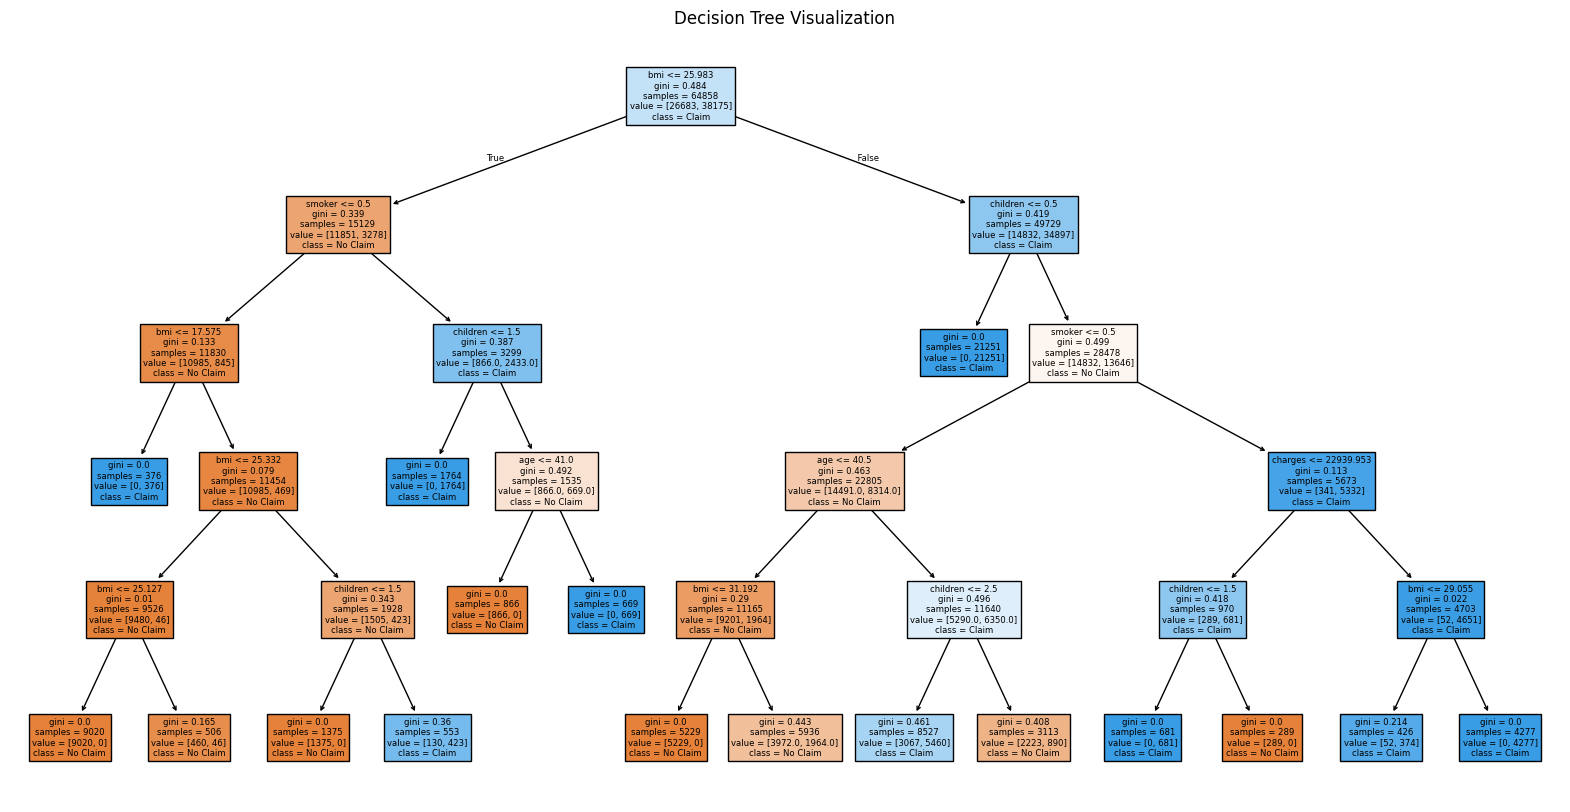

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(df_model_1, filled=True, feature_names=X.columns, class_names=['No Claim', 'Claim'])
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
y_pred = df_model_1.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Decision Tree with Gini criterion and max depth of 5 :", accuracy*100)

Accuracy for Decision Tree with Gini criterion and max depth of 5 : 90.21160708695925


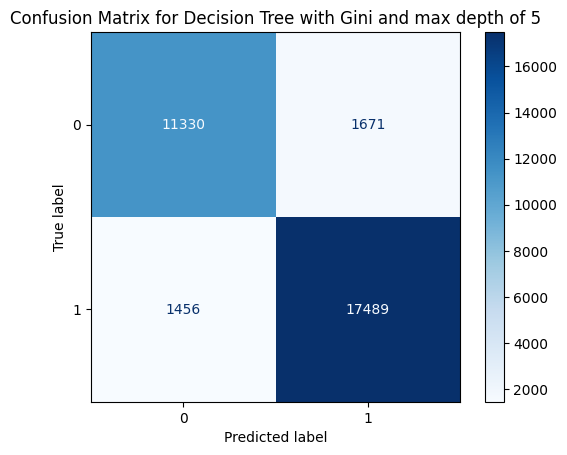

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree with Gini and max depth of 5")
plt.show()

In [ ]:
df_model_2 = DecisionTreeClassifier(criterion='gini', max_depth = 7, random_state=42)
df_model_2.fit(X_train,y_train)
y_pred = df_model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Decision Tree with Gini criterion and max depth of 7 :", accuracy*100)

Accuracy for Decision Tree with Gini criterion and max depth of 7 : 95.84611531960184


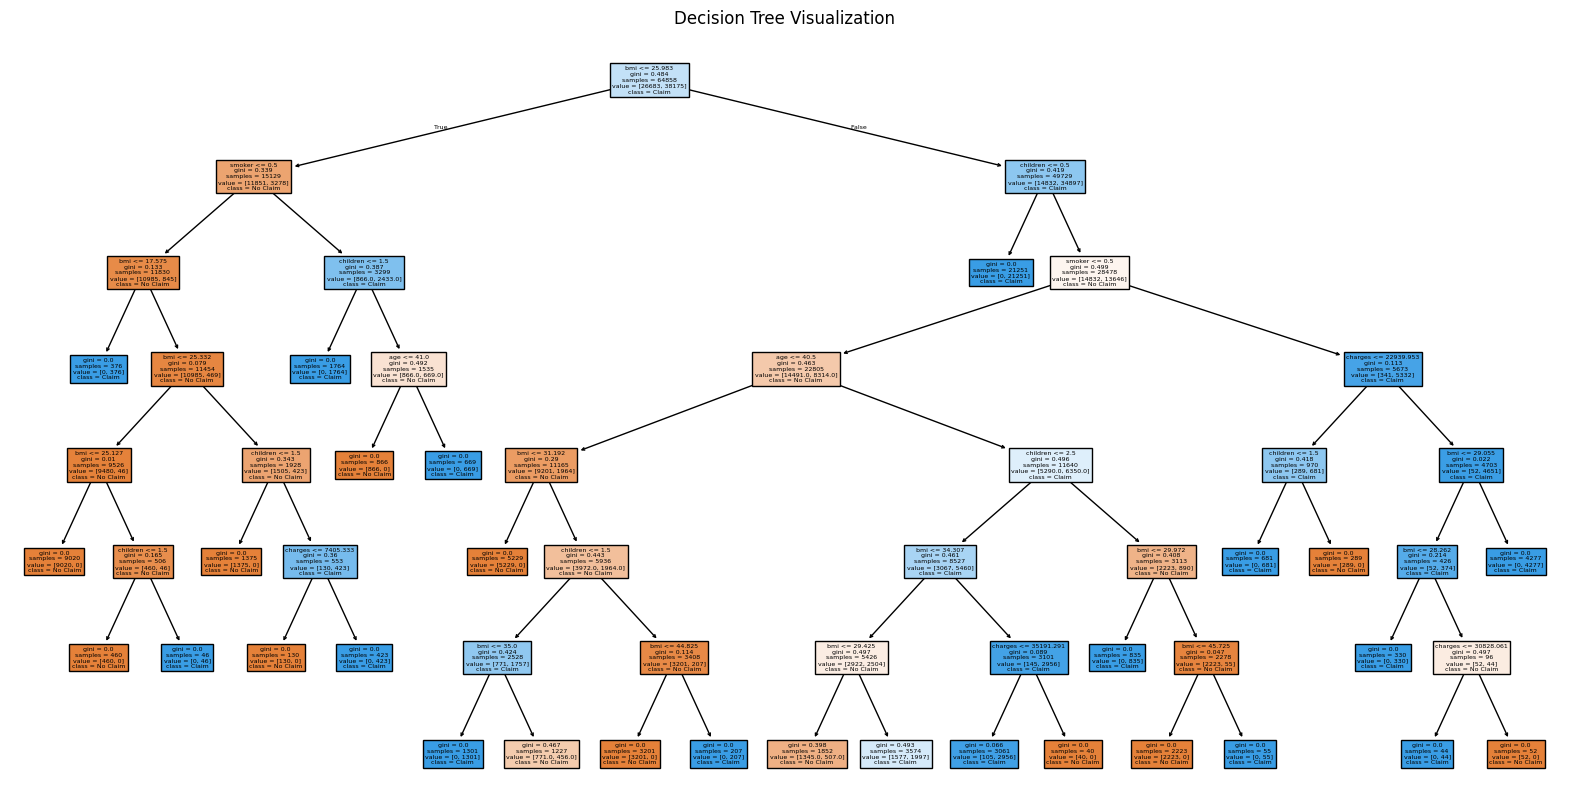

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(df_model_2, filled=True, feature_names=X.columns, class_names=['No Claim', 'Claim'])
plt.title("Decision Tree Visualization")
plt.show()

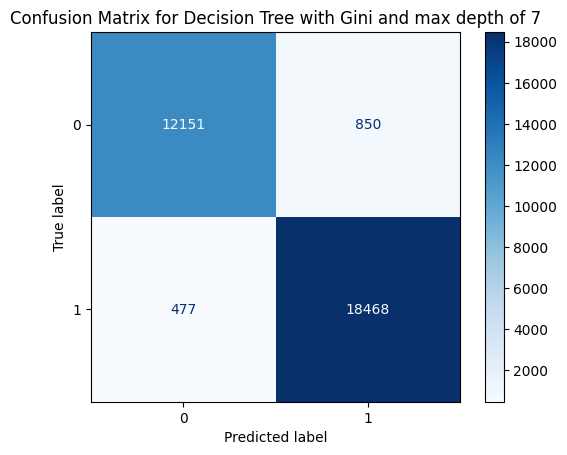

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree with Gini and max depth of 7")
plt.show()

In [ ]:
df_model_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=42)
df_model_3.fit(X_train,y_train)
y_pred = df_model_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Decision Tree with entropy criterion and max depth of 3 :", accuracy*100)

Accuracy for Decision Tree with entropy criterion and max depth of 3 : 84.75239466599888


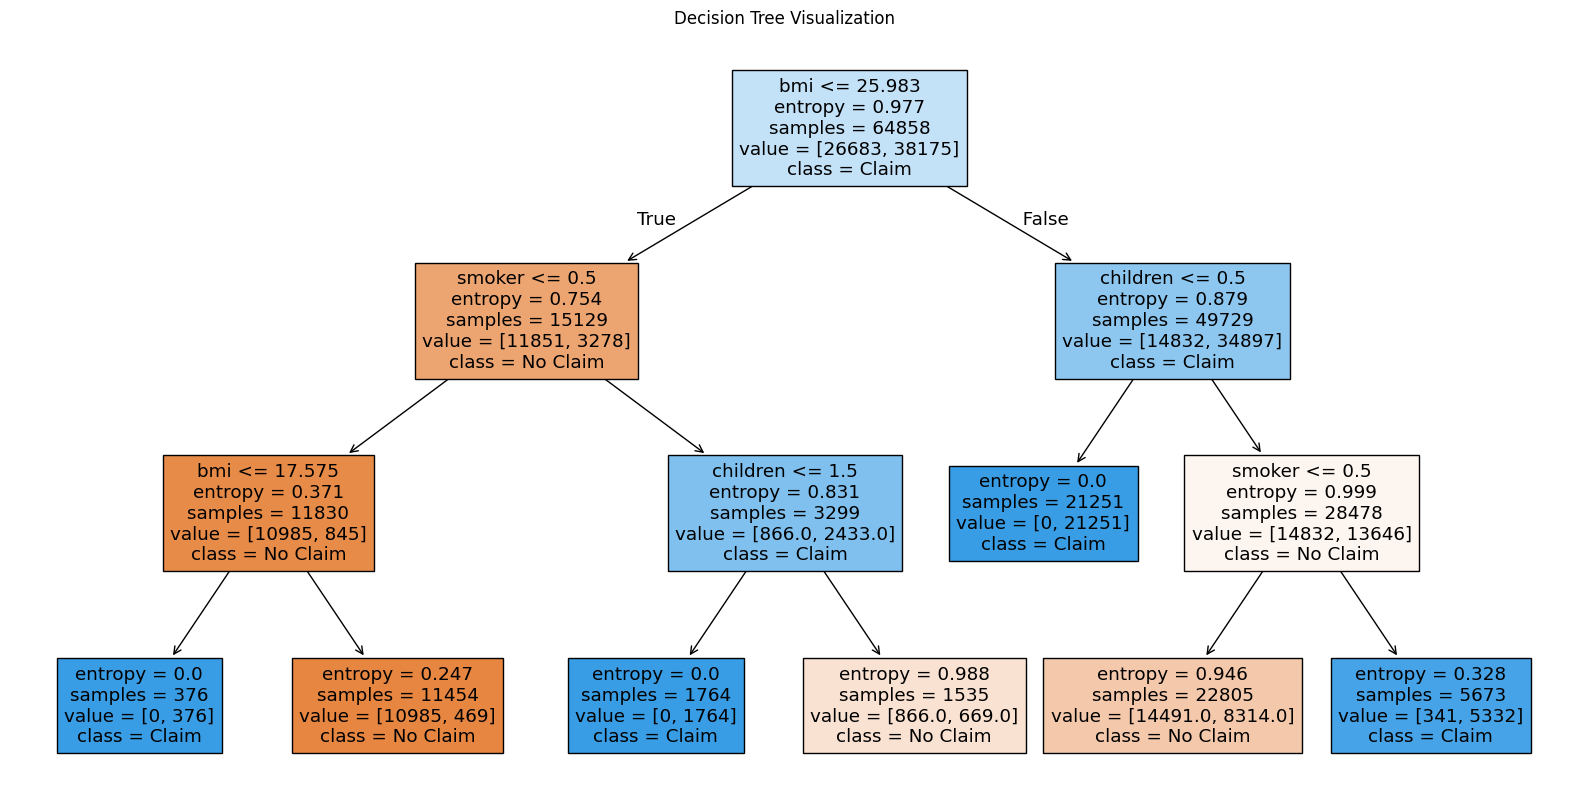

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(df_model_3, filled=True, feature_names=X.columns, class_names=['No Claim', 'Claim'])
plt.title("Decision Tree Visualization")
plt.show()

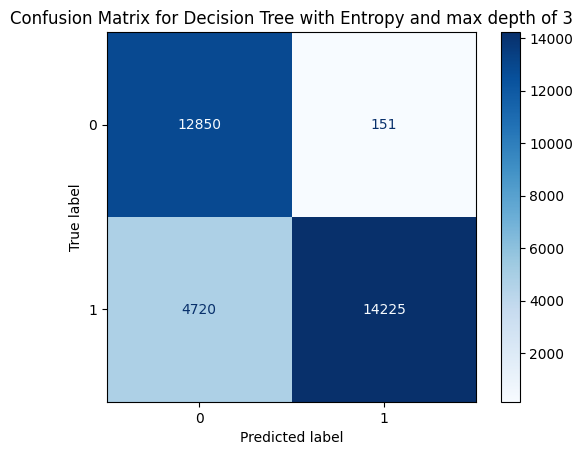

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Decision Tree with Entropy and max depth of 3")
plt.show()

# **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df_final.drop(columns=['insuranceclaim'],axis=1)
y = df_final['insuranceclaim']

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train, columns=X.columns)

region  NIC_LB90   NIC_MOE    NIC_PT  NIC_UB90  NIPR_LB90  NIPR_MOE  \
0      0.491678  1.410011  0.163755  1.406857  1.403711   1.287631 -1.036510   
1      0.491678  0.038719  0.413619  0.040104  0.041481   0.016344  0.587165   
2     -0.447070 -0.637089 -1.030469 -0.639103 -0.641103  -0.636544 -0.774786   
3     -0.447070 -0.549052 -0.842311 -0.550624 -0.552184  -0.549899 -0.645877   
4      0.491678 -0.635182 -1.038149 -0.637229 -0.639262  -0.642092 -0.775211   
...         ...       ...       ...       ...       ...        ...       ...   
64853  0.491678  0.747422  0.075704  0.745710  0.744002   0.715095 -1.036510   
64854  1.430427 -0.065222  0.442910 -0.063456 -0.061699  -0.024745  0.551159   
64855 -1.385818  1.077157 -0.482517  1.072562  1.067985   0.886916 -1.036510   
64856  0.491678 -0.496326 -1.054401 -0.498801 -0.501259  -0.516930 -1.036510   
64857  0.491678 -0.503025 -0.421703 -0.503206 -0.503383  -0.502869 -0.174060   

        NIPR_PT  NIPR_UB90  NUI_LB90  ...  NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
0      1.282742   1.277852  0.388241  ...  0.401330  -1.422512  -1.422512   
1      0.018251   0.020153 -0.104722  ... -0.103129  -0.728233  -0.728233   
2     -0.638348  -0.640142 -0.524084  ... -0.534145   4.131716   4.131716   
3     -0.551381  -0.552854 -0.460980  ... -0.468467   0.660323   0.660323   
4     -0.643891  -0.645680 -0.567562  ... -0.580767   1.354602   1.354602   
...         ...        ...       ...  ...       ...        ...        ...   
64853  0.710868   0.706645  0.399150  ...  0.408524  -1.075373  -1.075373   
64854 -0.022909  -0.021077  0.197576  ...  0.206217  -0.033955  -0.033955   
64855  0.882490   0.878067 -0.303105  ... -0.295322  -1.422512  -1.422512   
64856 -0.519732  -0.522521 -0.544558  ... -0.552013  -0.381094  -0.381094   
64857 -0.502859  -0.502843 -0.416595  ... -0.419786   0.660323   0.660323   

       PCTUI_PT       age       sex       bmi  children    smoker   charges  
0     -1.001588  0.769510 -1.010197  2.482336 -0.077260 -0.511284 -0.312283  
1     -0.430573  1.479842 -1.010197  1.179457 -0.907567 -0.511284 -0.058387  
2      2.240303 -0.438055 -1.010197  1.971244  1.583356 -0.511284 -0.573505  
3      0.416739 -0.011856  0.989906 -0.741599 -0.077260 -0.511284 -0.592956  
4     -1.462084  0.556410  0.989906  2.714355 -0.077260 -0.511284 -0.432355  
...         ...       ...       ...       ...       ...       ...       ...  
64853 -0.375314  1.408809  0.989906  0.162141  0.753048 -0.511284 -0.035441  
64854  1.061434  0.556410 -1.010197  0.196214 -0.077260 -0.511284 -0.394061  
64855 -1.941000  0.059178  0.989906  0.321958 -0.077260  1.955859  2.110699  
64856 -1.793641  0.698477  0.989906  1.090219  0.753048 -0.511284 -0.332343  
64857  0.398319 -0.082889 -1.010197  1.125914 -0.907567 -0.511284 -0.652429  

[64858 rows x 22 columns]

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}")

Logistic Regression Accuracy: 88.33


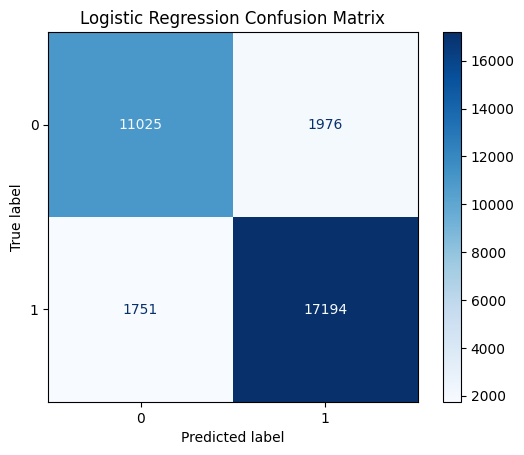

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# **Support Vector Machines**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Insurance_Data_final-2.csv")

In [ ]:
df

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
0         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
1         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
2         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
3         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
4         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
...       ...        ...      ...        ...        ...        ...       ...   
96799     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96800     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96801     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96802     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96803     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  PCTIC_MOE  PCTUI_MOE  PCTUI_PT  \
0      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
1      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
2      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
3      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
4      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
...          ...        ...       ...  ...        ...        ...       ...   
96799   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96800   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96801   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96802   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96803   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   

        age  sex     bmi  children  smoker      charges  insuranceclaim  
0      18.0  1.0  33.770       1.0     0.0   1725.55230             1.0  
1      28.0  1.0  33.000       3.0     0.0   4449.46200             0.0  
2      31.0  0.0  25.740       0.0     0.0   3756.62160             0.0  
3      46.0  0.0  33.440       1.0     0.0   8240.58960             1.0  
4      62.0  0.0  26.290       0.0     1.0  27808.72510             1.0  
...     ...  ...     ...       ...     ...          ...             ...  
96799  62.0  1.0  26.695       0.0     1.0  28101.33305             1.0  
96800  61.0  1.0  33.535       0.0     0.0  13143.33665             1.0  
96801  42.0  0.0  32.870       0.0     0.0   7050.02130             1.0  
96802  23.0  0.0  24.225       2.0     0.0  22395.74424             0.0  
96803  18.0  0.0  31.920       0.0     0.0   2205.98080             1.0  

[96804 rows x 23 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and split the dataset
X = df.drop(columns=['insuranceclaim'])
y = df['insuranceclaim']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Display sample of data
print("Training Data Sample:")
pd.DataFrame(X_train[:5])

Training Data Sample:


0         1         2         3         4         5         6   \
0  0.490351  0.040438  0.414097  0.041831  0.043217  0.017430  0.587660   
1  0.490351  1.726885  0.766488  1.725011  1.723137  1.699383 -1.032954   
2 -1.387485  1.566172  0.304971  1.563058  1.559950  1.437792 -1.032954   
3  0.490351  0.487570  0.094907  0.486600  0.485633  0.471265 -1.032954   
4 -1.387485 -0.383034  0.100960 -0.381635 -0.380242 -0.373710  0.336940   

         7         8         9   ...        12        13        14        15  \
0  0.019346  0.021257 -0.105339  ... -0.103723 -0.728618 -0.728618 -0.432852   
1  1.693962  1.688537  1.246347  ...  1.258090 -1.073952 -1.073952 -0.174940   
2  1.432681  1.427568  0.492352  ...  0.507706 -1.419286 -1.419286 -0.948676   
3  0.467301  0.463342  0.281107  ...  0.294371 -0.728618 -0.728618 -0.211784   
4 -0.372156 -0.370602 -0.263058  ... -0.258712  0.652719  0.652719  0.672487   

         16        17        18        19        20        21  
0  0.342622 -1.012097 -0.158838  0.756965 -0.512290 -0.421844  
1 -0.938195  0.988047 -0.605660 -0.908502  1.952018  0.300319  
2  0.484935 -1.012097  0.477273 -0.075769 -0.512290 -0.372349  
3 -1.365134 -1.012097 -1.034608 -0.908502  1.952018  1.043613  
4  1.694596 -1.012097 -0.495173 -0.908502  1.952018  1.321662  

[5 rows x 22 columns]


Kernel: linear
  C = 0.1
    Accuracy: 0.8925
    Confusion Matrix:
[[ 6951   923]
 [ 1158 10329]]


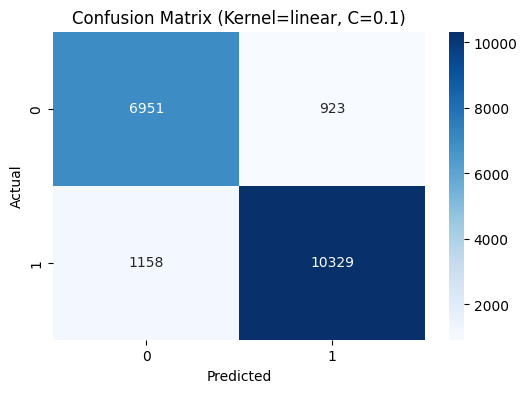

  C = 1
    Accuracy: 0.8927
    Confusion Matrix:
[[ 6952   922]
 [ 1156 10331]]


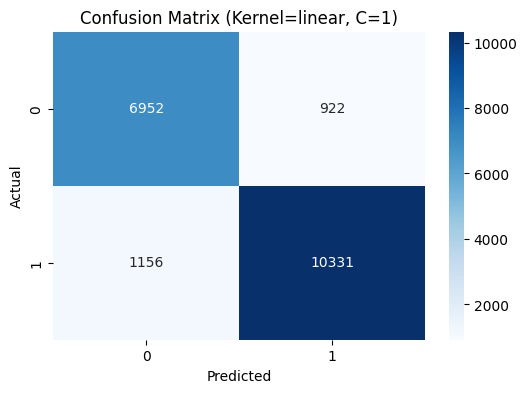

  C = 10
    Accuracy: 0.8927
    Confusion Matrix:
[[ 6952   922]
 [ 1156 10331]]


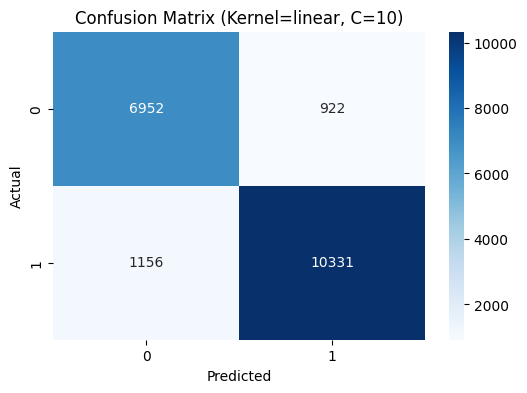


Kernel: poly
  C = 0.1
    Accuracy: 0.9026
    Confusion Matrix:
[[ 6956   918]
 [  968 10519]]


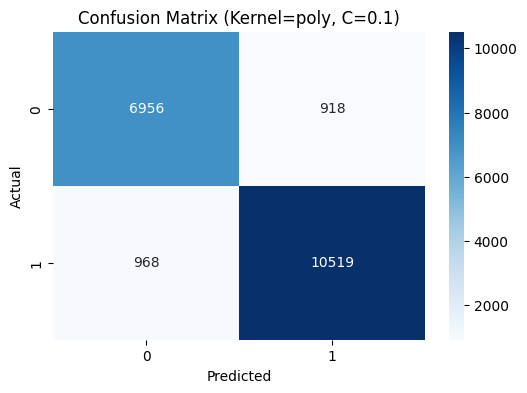

  C = 1
    Accuracy: 0.9116
    Confusion Matrix:
[[ 7278   596]
 [ 1116 10371]]


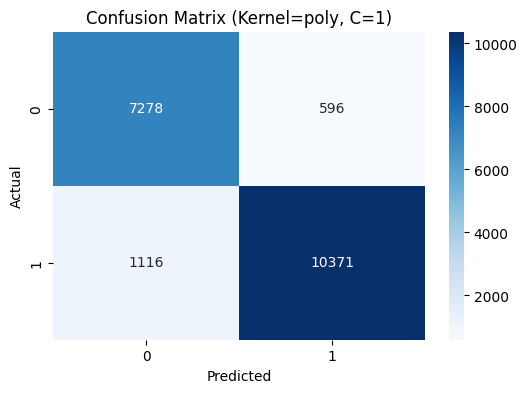

  C = 10
    Accuracy: 0.9122
    Confusion Matrix:
[[ 7284   590]
 [ 1109 10378]]


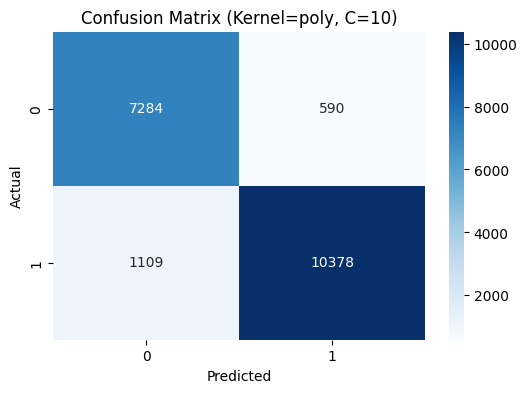


Kernel: rbf
  C = 0.1
    Accuracy: 0.9100
    Confusion Matrix:
[[ 7337   537]
 [ 1205 10282]]


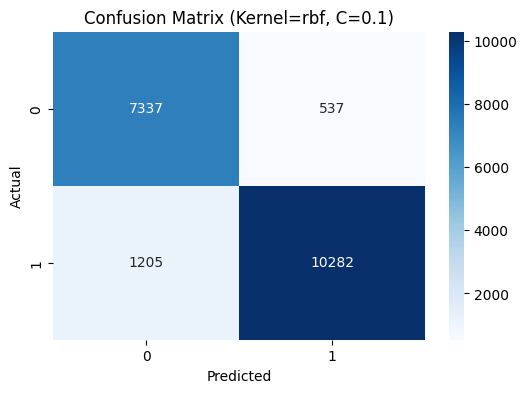

  C = 1


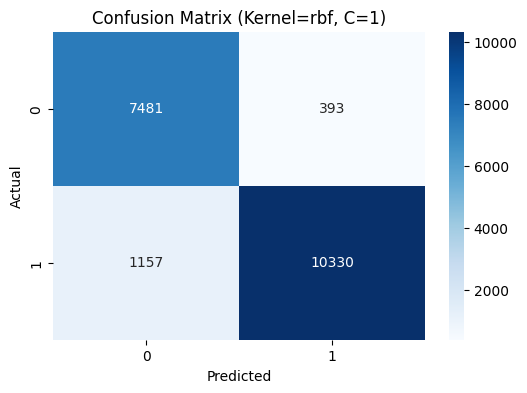

  C = 10
    Accuracy: 0.9424
    Confusion Matrix:
[[ 7528   346]
 [  769 10718]]


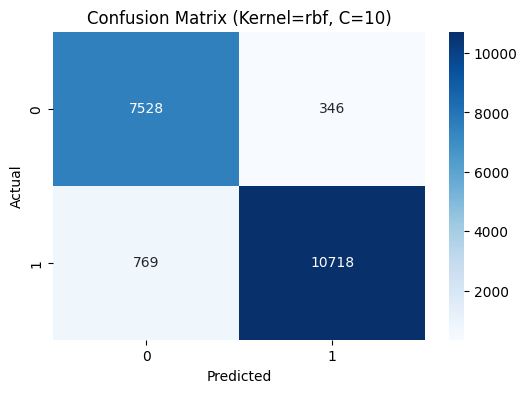


Best Model: Kernel=rbf, C=10 with Accuracy=0.9424


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Kernels to try
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

# Results storage
results = {}

# Loop through kernels and costs
for kernel in kernels:
    print(f"\nKernel: {kernel}")
    for C in C_values:
        print(f"  C = {C}")
        # Train SVM
        model = SVC(kernel=kernel, C=C, random_state=42)
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results
        results[(kernel, C)] = acc

        # Display confusion matrix
        print(f"    Accuracy: {acc:.4f}")
        print(f"    Confusion Matrix:\n{conf_matrix}")

        # Visualize confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix (Kernel={kernel}, C={C})")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

# Best kernel and cost
best_model = max(results, key=results.get)
print(f"\nBest Model: Kernel={best_model[0]}, C={best_model[1]} with Accuracy={results[best_model]:.4f}")


# **Ensemble Algorithms**

In [ ]:
df

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
0         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
1         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
2         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
3         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
4         2.0  3533978.0  14547.0  3548525.0  3563072.0  4018412.0       0.0   
...       ...        ...      ...        ...        ...        ...       ...   
96799     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96800     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96801     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96802     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   
96803     0.0   175288.0   3481.0   178769.0   182250.0   186616.0    3435.0   

         NIPR_PT  NIPR_UB90  NUI_LB90  ...  PCTIC_MOE  PCTUI_MOE  PCTUI_PT  \
0      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
1      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
2      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
3      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
4      4018412.0  4018412.0  455340.0  ...        0.4        0.4      11.7   
...          ...        ...       ...  ...        ...        ...       ...   
96799   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96800   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96801   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96802   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   
96803   190051.0   193486.0    9971.0  ...        0.7        0.7       5.9   

        age  sex     bmi  children  smoker      charges  insuranceclaim  
0      18.0  1.0  33.770       1.0     0.0   1725.55230             1.0  
1      28.0  1.0  33.000       3.0     0.0   4449.46200             0.0  
2      31.0  0.0  25.740       0.0     0.0   3756.62160             0.0  
3      46.0  0.0  33.440       1.0     0.0   8240.58960             1.0  
4      62.0  0.0  26.290       0.0     1.0  27808.72510             1.0  
...     ...  ...     ...       ...     ...          ...             ...  
96799  62.0  1.0  26.695       0.0     1.0  28101.33305             1.0  
96800  61.0  1.0  33.535       0.0     0.0  13143.33665             1.0  
96801  42.0  0.0  32.870       0.0     0.0   7050.02130             1.0  
96802  23.0  0.0  24.225       2.0     0.0  22395.74424             0.0  
96803  18.0  0.0  31.920       0.0     0.0   2205.98080             1.0  

[96804 rows x 23 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target
X = df.drop(columns=["insuranceclaim"])  # Replace 'df' with your dataset variable
y = df["insuranceclaim"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features for AdaBoost (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Accuracy: 0.9999483497753215


[[ 7874     0]
 [    1 11486]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7874
         1.0       1.00      1.00      1.00     11487

    accuracy                           1.00     19361
   macro avg       1.00      1.00      1.00     19361
weighted avg       1.00      1.00      1.00     19361



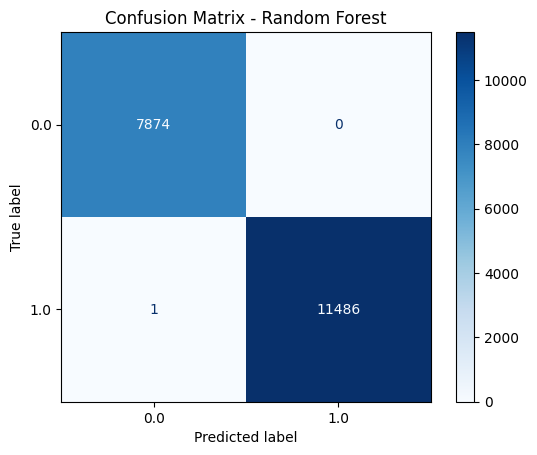

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Print accuracy
print("Random Forest Accuracy:", rf_acc)

print("\n")

print(rf_conf_matrix)

print("\n")

print(classification_report(y_test, rf_y_pred))
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

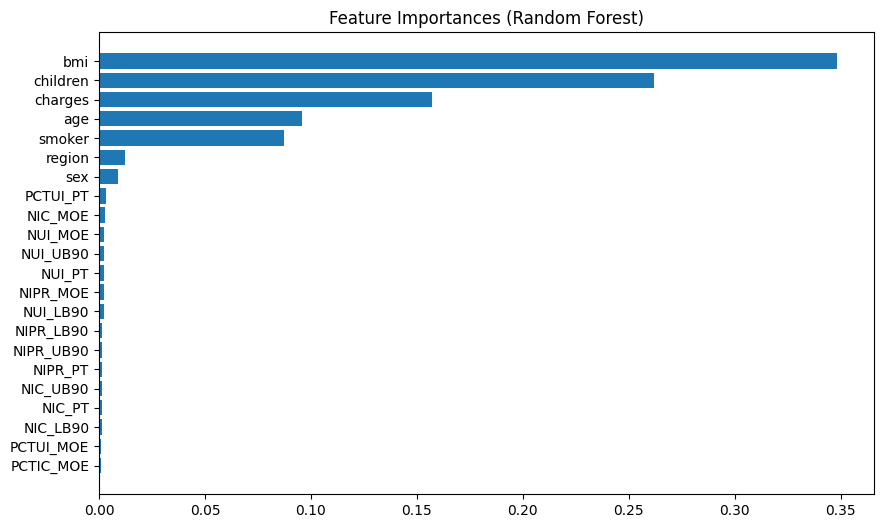

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.title("Feature Importances (Random Forest)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.8822891379577501


[[ 6764  1110]
 [ 1169 10318]]




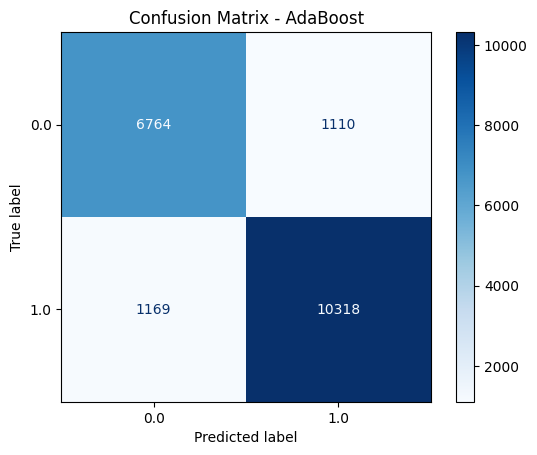



              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      7874
         1.0       0.90      0.90      0.90     11487

    accuracy                           0.88     19361
   macro avg       0.88      0.88      0.88     19361
weighted avg       0.88      0.88      0.88     19361



In [ ]:
#AdaBoost Implementation

from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
ab_y_pred = ab_model.predict(X_test_scaled)
ab_acc = accuracy_score(y_test, ab_y_pred)
ab_conf_matrix = confusion_matrix(y_test, ab_y_pred)

print("AdaBoost Accuracy:", ab_acc)

print("\n")

print(ab_conf_matrix)
print("\n")

disp = ConfusionMatrixDisplay(confusion_matrix=ab_conf_matrix, display_labels=ab_model.classes_)
disp.plot(cmap="Blues", values_format = 'd')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

print("\n")

print(classification_report(y_test,ab_y_pred))

In [ ]:
X_train

region   NIC_LB90  NIC_MOE     NIC_PT   NIC_UB90  NIPR_LB90  NIPR_MOE  \
28991     2.0  2186704.0  19328.0  2206032.0  2225360.0  2461124.0   19120.0   
7266      2.0  7394980.0  23287.0  7418267.0  7441554.0  8475044.0       0.0   
77509     0.0  6898650.0  18102.0  6916752.0  6934854.0  7539709.0       0.0   
7978      2.0  3567588.0  15742.0  3583330.0  3599072.0  4083837.0       0.0   
87136     0.0   878890.0  15810.0   894700.0   910510.0  1062582.0   16162.0   
...       ...        ...      ...        ...        ...        ...       ...   
6265      2.0  4387460.0  15544.0  4403004.0  4418548.0  4967183.0       0.0   
54886     3.0  1863932.0  19656.0  1883588.0  1903244.0  2313759.0   18696.0   
76820     0.0  5411396.0   9293.0  5420689.0  5429982.0  5583416.0       0.0   
860       2.0   525212.0   2889.0   528101.0   530990.0   548544.0       0.0   
15795     2.0   504410.0   9974.0   514384.0   524358.0   598973.0   10156.0   

         NIPR_PT  NIPR_UB90   NUI_LB90  ...   NUI_UB90  PCTIC_MOE  PCTUI_MOE  \
28991  2480244.0  2499364.0   265076.0  ...   283348.0        0.4        0.4   
7266   8475044.0  8475044.0  1033490.0  ...  1080064.0        0.3        0.3   
77509  7539709.0  7539709.0   604855.0  ...   641059.0        0.2        0.2   
7978   4083837.0  4083837.0   484765.0  ...   516249.0        0.4        0.4   
87136  1078744.0  1094906.0   175415.0  ...   192673.0        0.8        0.8   
...          ...        ...        ...  ...        ...        ...        ...   
6265   4967183.0  4967183.0   548635.0  ...   579723.0        0.3        0.3   
54886  2332455.0  2351151.0   435197.0  ...   462537.0        0.6        0.6   
76820  5583416.0  5583416.0   153434.0  ...   172020.0        0.2        0.2   
860     548544.0   548544.0    17554.0  ...    23332.0        0.5        0.5   
15795   609129.0   619285.0    89566.0  ...    99924.0        0.8        0.8   

       PCTUI_PT   age  sex     bmi  children  smoker      charges  
28991      11.1  44.0  0.0  29.810       2.0     0.0   8219.20390  
7266       12.5  26.0  1.0  27.060       0.0     1.0  17043.34140  
77509       8.3  46.0  0.0  33.725       1.0     0.0   8823.98575  
7978       12.3  20.0  0.0  24.420       0.0     1.0  26125.67477  
87136      17.1  63.0  0.0  27.740       0.0     1.0  29523.16560  
...         ...   ...  ...     ...       ...     ...          ...  
6265       11.4  59.0  1.0  31.790       2.0     0.0  12928.79110  
54886      19.2  47.0  0.0  32.000       1.0     0.0   8551.34700  
76820       2.9  40.0  1.0  32.775       1.0     1.0  39125.33225  
860         3.7  49.0  1.0  37.510       2.0     0.0   9304.70190  
15795      15.6  38.0  0.0  37.730       0.0     0.0   5397.61670  

[77443 rows x 22 columns]

Comparison

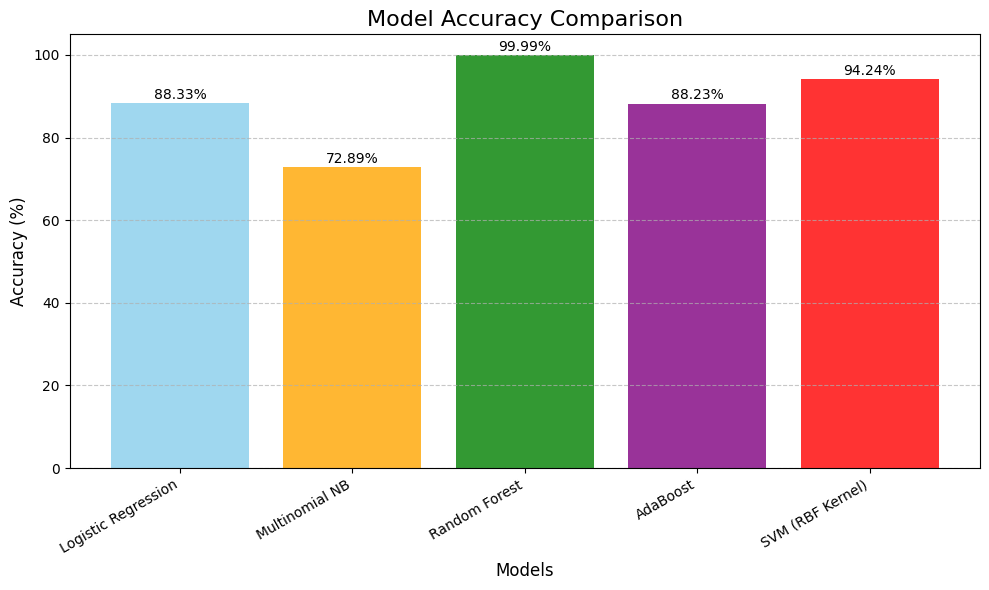

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracies
models = ["Logistic Regression", "Multinomial NB", "Random Forest", "AdaBoost", "SVM (RBF Kernel)"]
accuracies = [88.33, 72.89, 99.99, 88.23, 94.24]

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['skyblue', 'orange', 'green', 'purple', 'red']

plt.bar(models, accuracies, color=colors, alpha=0.8)

# Add titles and labels
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 105)

# Add accuracy values on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc}%", ha='center', fontsize=10)

# Display the chart
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from graphviz import Digraph

# Initialize the flowchart
flowchart = Digraph(format='png', engine='dot')
flowchart.attr(rankdir='TB', size='8,5')

# Add nodes
flowchart.node("A", "Raw Data\n(Insurance + Census)")
flowchart.node("B", "Data Cleaning & Preprocessing")
flowchart.node("C", "Exploratory Data Analysis (EDA)")
flowchart.node("D", "Feature Engineering\n(e.g., PCA, Encoding)")
flowchart.node("E", "Model Building\n(SVM, Ensemble, NB, etc.)")
flowchart.node("F", "Model Evaluation\n(Confusion Matrix, Accuracy)")
flowchart.node("G", "Insights & Conclusions")

# Add edges to define flow
flowchart.edges(["AB", "BC", "CD", "DE", "EF", "FG"])

# Render and display the flowchart
flowchart.render("data_to_insight_pipeline", view=True)

'data_to_insight_pipeline.png'